# Preliminary Analysis (EDA)

In [1]:
import numpy as np
import pandas as pd
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from fuzzywuzzy import fuzz
import re

In [2]:
cleaned_df = pd.read_csv("../Dataset/New_Data/4_bare_land_filtered_df.csv", low_memory=False)

In [3]:
pd.set_option("display.max_rows", 10)
cleaned_df

ad_id     UID            street          city   
0       232745   71194      Fussels lane     Colombo 6  \
1       237182   29192     Highlevel Rd.      Nugegoda   
2       245752   71194    Karshue Avenue     Colombo 8   
3       251172   17540               NaN  Battaramulla   
4       253432   71194       Cotta Road      Colombo 8   
...        ...     ...               ...           ...   
42959  5528437  193404               NaN   Kahathuduwa   
42960  5410000   53682     Hospital Road      Dehiwala   
42961  5446833  120689            Malabe        Malabe   
42962  5447305  195582         madapatha   Piliyandala   
42963  5520807    3905  Anganpitiya Road   Ethul Kotte   

                                                 heading   
0                       Ideal plot of land in Colombo 06  \
1      Excellent Block Of 69 Perches Facing Highlevel...   
2                       6 perch land at Borella for sale   
3      56.7P Land Directly Overlooking Parliment Grou...   
4                              Land for sale in Borella    
...                                                  ...   
42959               Land For Sale In Near To Kahathuduwa   
42960               Land for Sale in Dehiwela Kalubowila   
42961                           Commercial Land For Sale   
42962              Land for Sale in Kahapola-Piliyandala   
42963                           70 perch land sale kotte   

                                                    desc          posted_date   
0      The perfect plot of land for your residence in...  2018-01-19 18:48:36  \
1      This Valuable Block is Located Next to Prime L...  2018-02-23 00:33:49   
2      The perfect location to build your dream home ...  2018-05-08 13:44:47   
3      ?Our Reference No. SL 8551<br />\n<br />\n(Ple...  2018-06-25 10:26:07   
4      The perfect plot of land for your business or ...  2018-07-12 14:46:55   
...                                                  ...                  ...   
42959  ?120 ප්‍රධාන බස් පාරගයට මීටර 30ක දුරකි..<br />...  2023-08-10 08:50:00   
42960  Land for Sale in Dehiwela Kalubowila, 19.5p, P...  2023-01-03 08:45:00   
42961  Address: Kaduwela Main Road (New Kandy Road), ...  2023-03-12 02:49:00   
42962  Valuable Land situated at the Kahapola junctio...  2023-03-12 09:29:00   
42963  70 P Land for SALE in Ethukotte ( sri jayawarr...  2023-07-29 09:10:00   

           price price_type  price_land_pp  ...  land_shape  city_no   
0       45000000  Per Perch     45000000.0  ...         NaN        6  \
1       10000000  Per Perch     10000000.0  ...      Square       27   
2       42000000                 7000000.0  ...         NaN        8   
3      141750000                 2500000.0  ...         NaN     1710   
4       65000000                 7926829.0  ...         NaN        8   
...          ...        ...            ...  ...         ...      ...   
42959     875000  Per Perch       875000.0  ...         NaN     5128   
42960    4000000  Per Perch      4000000.0  ...         NaN       24   
42961   23250000  Per Perch     23250000.0  ...    triangle       69   
42962     675000  Per Perch       675000.0  ...   rectangle       36   
42963    3000000  Per Perch      3000000.0  ...         NaN     1994   

          city_name                 alt_name  city_lat   city_lon  g_city_lat   
0         Colombo 6   Wellawatte / Pamankada  6.874691  79.860748    6.874691  \
1          Nugegoda                      NaN  6.864908  79.899681    6.864908   
2         Colombo 8                  Borella  6.914720  79.877800    6.912180   
3      Battaramulla                      NaN  6.898378  79.922256    6.897994   
4         Colombo 8                  Borella  6.914720  79.877800    6.912180   
...             ...                      ...       ...        ...         ...   
42959   Kahathuduwa                      NaN  6.782298  79.994797    6.782298   
42960      Dehiwala                 Dehiwela  6.830119  79.880081    6.830119   
42961        Malabe     

In [4]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42964 entries, 0 to 42963
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ad_id             42964 non-null  int64  
 1   UID               42964 non-null  int64  
 2   street            27105 non-null  object 
 3   city              42964 non-null  object 
 4   heading           42962 non-null  object 
 5   desc              42963 non-null  object 
 6   posted_date       42964 non-null  object 
 7   price             42964 non-null  int64  
 8   price_type        40467 non-null  object 
 9   price_land_pp     42963 non-null  float64
 10  price_land_pa     42963 non-null  float64
 11  price_land_total  42963 non-null  float64
 12  agent_ref         18933 non-null  object 
 13  contact_type      42813 non-null  object 
 14  contact_name      42206 non-null  object 
 15  email             42960 non-null  object 
 16  lat               10919 non-null  float6

## Calculate Maxmimum, Minimum, Average, Standard Deviation, Median of prices per each city

In [5]:
cleaned_df['main_city'] = cleaned_df['main_city'].str.strip()

aggregations = {
    'price_land_pp': ['min', 'max', 'mean', 'std', 'median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)]
}

mask = cleaned_df['price_land_pp'] == 0

zero_removed = cleaned_df[~mask]

In [6]:
# output_csv_path = '../Dataset/New_Data/5_zeros_removed_cleaned.csv' 
# zero_removed.to_csv(output_csv_path, index=False)

In [7]:
zero_removed = pd.read_csv("../Dataset/New_Data/5_zeros_removed_cleaned.csv", low_memory=False)

In [8]:
# Remove kadawatha and Peliyagoda and Colombo 11
zero_removed = zero_removed[zero_removed['main_city'] != 'Kadawatha']
zero_removed = zero_removed[zero_removed['main_city'] != 'Peliyagoda']
zero_removed = zero_removed[zero_removed['main_city'] != 'Colombo 11']

In [9]:
output_csv_path = '../Dataset/New_Data/5.1_zeros_removed_cleaned_date_corrected.csv' 
zero_removed.to_csv(output_csv_path, index=False)

In [10]:
pd.set_option("display.max_rows", 10)

zero_removed

ad_id     UID          city   
0       232745   71194     Colombo 6  \
1       237182   29192      Nugegoda   
2       245752   71194     Colombo 8   
3       251172   17540  Battaramulla   
4       253432   71194     Colombo 8   
...        ...     ...           ...   
41330  5528437  193404   Kahathuduwa   
41331  5410000   53682      Dehiwala   
41332  5446833  120689        Malabe   
41333  5447305  195582   Piliyandala   
41334  5520807    3905   Ethul Kotte   

                                                 heading   
0                       Ideal plot of land in Colombo 06  \
1      Excellent Block Of 69 Perches Facing Highlevel...   
2                       6 perch land at Borella for sale   
3      56.7P Land Directly Overlooking Parliment Grou...   
4                              Land for sale in Borella    
...                                                  ...   
41330               Land For Sale In Near To Kahathuduwa   
41331               Land for Sale in Dehiwela Kalubowila   
41332                           Commercial Land For Sale   
41333              Land for Sale in Kahapola-Piliyandala   
41334                           70 perch land sale kotte   

                                                    desc      posted_date   
0      The perfect plot of land for your residence in...  1/19/2018 18:48  \
1      This Valuable Block is Located Next to Prime L...   2/23/2018 0:33   
2      The perfect location to build your dream home ...   5/8/2018 13:44   
3      ?Our Reference No. SL 8551<br />\n<br />\n(Ple...  6/25/2018 10:26   
4      The perfect plot of land for your business or ...  7/12/2018 14:46   
...                                                  ...              ...   
41330  ?120 ප්‍රධාන බස් පාරගයට මීටර 30ක දුරකි..<br />...   8/10/2023 8:50   
41331  Land for Sale in Dehiwela Kalubowila, 19.5p, P...    1/3/2023 8:45   
41332  Address: Kaduwela Main Road (New Kandy Road), ...   3/12/2023 2:49   
41333  Valuable Land situated at the Kahapola junctio...   3/12/2023 9:29   
41334  70 P Land for SALE in Ethukotte ( sri jayawarr...   7/29/2023 9:10   

           price  price_land_pp  price_land_pa  price_land_total  ...   
0       45000000     45000000.0   7.200000e+09       281250000.0  ...  \
1       10000000     10000000.0   1.600000e+09       600000000.0  ...   
2       42000000      7000000.0   1.120000e+09        42000000.0  ...   
3      141750000      2500000.0   0.000000e+00       141750000.0  ...   
4       65000000      7926829.0   0.000000e+00        65000000.0  ...   
...          ...            ...            ...               ...  ...   
41330     875000       875000.0   0.000000e+00         8750000.0  ...   
41331    4000000      4000000.0   0.000000e+00        78000000.0  ...   
41332   23250000     23250000.0   0.000000e+00       651000000.0  ...   
41333     675000       675000.0   0.000000e+00         7202250.0  ...   
41334    3000000      3000000.0   0.000000e+00       210000000.0  ...   

                          contact_name                           email   
0                       Linea Property         Lineaproperty@gmail.com  \
1                       prabash perera             rangala08@gmail.com   
2                       Linea Property         Lineaproperty@gmail.com   
3                     Bimsara B Gamage               homes@bimsara.com   
4                       Linea Property         Lineaproperty@gmail.com   
...                                ...                             ...   
41330            Prestige Property 01.  wikcramawijesiri2000@gmail.com   
41331                           Shaaan   shanmultiproperties@gmail.com   
41332  Divasiri Thotasinghe Arachchige              divasiri@gmail.com   
41333                sasanka wijeratne           sasanka.biz@gmail.com   
41334     SRI DREAM HOMES  REAL ESTATE        rsridreamhomes@yahoo.com   

      city_no     city_name  city_lat   city_lon  g_city_lat  g_city_lon   
0           6     Colombo 6  6.874691  7

In [11]:
price_by_city = zero_removed.groupby('main_city').agg(aggregations)

price_by_city.columns = ['min_price', 'max_price', 'mean_price', 'std_price', 'median_price', '25%_percentile', '75%_percentile']

price_by_city.reset_index(inplace=True)

price_by_city.fillna(0, inplace=True)  

In [12]:
pd.set_option('display.max_rows', None)

def format_millions(x):
    return '{:.3f}Mn'.format(x / 1e6)

pd.set_option('display.float_format', format_millions)

price_by_city

main_city  min_price   max_price  mean_price  std_price   
0           Angoda    0.000Mn     4.500Mn     0.965Mn    0.673Mn  \
1     Athurugiriya    0.000Mn    40.000Mn     1.133Mn    2.267Mn   
2      Avissawella    0.000Mn   250.000Mn     4.358Mn   29.138Mn   
3     Battaramulla    0.000Mn   305.000Mn     5.004Mn   14.752Mn   
4    Boralesgamuwa    0.000Mn   120.000Mn     2.901Mn    7.770Mn   
5        Colombo 1    0.000Mn   172.000Mn     2.203Mn   11.300Mn   
6       Colombo 10    0.019Mn   181.000Mn     4.725Mn   14.421Mn   
7       Colombo 12    0.000Mn   100.000Mn    13.190Mn   15.423Mn   
8       Colombo 13    0.002Mn    18.300Mn     5.744Mn    4.318Mn   
9       Colombo 14    0.650Mn  1300.000Mn    51.050Mn  203.584Mn   
10      Colombo 15    0.000Mn    10.000Mn     3.619Mn    1.518Mn   
11       Colombo 2    0.010Mn  1219.000Mn    35.928Mn  118.754Mn   
12       Colombo 3    0.003Mn  1100.000Mn    28.549Mn   78.545Mn   
13       Colombo 4    0.010Mn   270.000Mn    18.782Mn   28.444Mn   
14       Colombo 5    0.000Mn  6500.000Mn    19.425Mn  191.342Mn   
15       Colombo 6    0.000Mn 16000.000Mn    45.743Mn  667.069Mn   
16       Colombo 7    0.003Mn  1000.000Mn    26.861Mn   76.266Mn   
17       Colombo 8    0.000Mn   896.500Mn    20.507Mn   71.859Mn   
18       Colombo 9    0.200Mn   850.000Mn    31.613Mn  104.735Mn   
19        Dehiwala    0.000Mn 10000.000Mn    12.176Mn  252.592Mn   
20     Ethul Kotte    0.050Mn    76.500Mn     3.611Mn    4.899Mn   
21        Hanwella    0.000Mn   113.333Mn     0.606Mn    5.359Mn   
22       Hokandara    0.000Mn    50.000Mn     1.823Mn    4.004Mn   
23        Homagama    0.000Mn    24.000Mn     0.671Mn    0.656Mn   
24        Kaduwela    0.000Mn    65.000Mn     0.515Mn    1.655Mn   
25     Kahathuduwa    0.004Mn     6.500Mn     0.567Mn    0.430Mn   
26         Kesbewa    0.002Mn    11.500Mn     0.807Mn    0.480Mn   
27       Kolonnawa    0.002Mn     6.250Mn     1.307Mn    0.876Mn   
28         Kosgama    0.011Mn     0.980Mn     0.238Mn    0.181Mn   
29         Kottawa    0.000Mn   720.000Mn     2.027Mn   23.650Mn   
30      Maharagama    0.000Mn   195.000Mn     2.971Mn    8.085Mn   
31          Malabe    0.000Mn   550.000Mn     2.879Mn   16.842Mn   
32        Moratuwa    0.002Mn   105.932Mn     2.048Mn    6.126Mn   
33   Mount Lavinia    0.000Mn   320.000Mn     5.040Mn   14.719Mn   
34          Nawala    0.000Mn   357.500Mn     7.159Mn   20.948Mn   
35        Nugegoda    0.000Mn   270.000Mn     5.655Mn   16.267Mn   
36         Padukka    0.000Mn    10.500Mn     0.320Mn    0.380Mn   
37     Pannipitiya    0.000Mn   570.000Mn     2.073Mn   13.378Mn   
38     Piliyandala    0.000Mn    83.000Mn     1.010Mn    3.393Mn   
39      Pita Kotte    0.000Mn  3000.000Mn     8.937Mn  122.421Mn   
40     Polgasowita    0.065Mn    10.000Mn     0.561Mn    0.611Mn   
41      Rajagiriya    0.000Mn 16750.000Mn    27.763Mn  542.353Mn   
42      Rathmalana    0.000Mn    85.000Mn     2.917Mn    5.028Mn   
43       Thalagala    0.113Mn     4.000Mn     0.750Mn    1.065Mn   
44       Thalahena    0.004Mn    12.750Mn     1.744Mn    1.615Mn   
45      Thalangama    0.005Mn    35.000Mn     3.163Mn    5.052Mn   
46  Thalawathugoda    0.000Mn   320.000Mn     5.339Mn   27.262Mn   
47        Watareka    0.000Mn     2.700Mn     0.469Mn    0.274Mn   
48         Wattala    0.620Mn     2.095Mn     1.303Mn    0.543Mn   
49    Wellampitiya    0.250Mn  2700.000Mn    35.848Mn  305.575Mn   

    median_price  25%_percentile  75%_percentile  
0        0.812Mn         0.506Mn         1.300Mn  
1        0.850Mn         0.570Mn         1.100Mn  
2        0.174Mn         0.115Mn         0.238Mn  
3        2.600Mn         1.900Mn         3.800Mn  
4        1.800Mn         1.359Mn         2.250Mn  
5        0.565Mn         0.347Mn         1.155Mn  
6        0.650Mn         0.600Mn         0.661Mn  
7        7.975Mn         7.500Mn        12.875Mn  
8        5.000Mn         3.425Mn         6.500Mn  
9        7.000Mn         4.900

In [13]:
price_by_city['main_city']

0             Angoda
1       Athurugiriya
2        Avissawella
3       Battaramulla
4      Boralesgamuwa
5          Colombo 1
6         Colombo 10
7         Colombo 12
8         Colombo 13
9         Colombo 14
10        Colombo 15
11         Colombo 2
12         Colombo 3
13         Colombo 4
14         Colombo 5
15         Colombo 6
16         Colombo 7
17         Colombo 8
18         Colombo 9
19          Dehiwala
20       Ethul Kotte
21          Hanwella
22         Hokandara
23          Homagama
24          Kaduwela
25       Kahathuduwa
26           Kesbewa
27         Kolonnawa
28           Kosgama
29           Kottawa
30        Maharagama
31            Malabe
32          Moratuwa
33     Mount Lavinia
34            Nawala
35          Nugegoda
36           Padukka
37       Pannipitiya
38       Piliyandala
39        Pita Kotte
40       Polgasowita
41        Rajagiriya
42        Rathmalana
43         Thalagala
44         Thalahena
45        Thalangama
46    Thalawathugoda
47          W

In [14]:
# import pandas as pd
# import numpy as np

# # Lowercase 'main_city' column
# cleaned_df['main_city'] = cleaned_df['main_city'].str.lower()

# # Function to remove top and bottom 1% values
# def remove_outliers(series):
#     lower_limit = series.quantile(0.0000001)
#     upper_limit = series.quantile(0.99999999999)
#     return series[(series >= lower_limit) & (series <= upper_limit)]

# # Group by 'main_city' and calculate maximum, minimum, mean, standard deviation, and median after removing outliers
# def calculate_stats(group):
#     max_price = np.max(remove_outliers(group))
#     min_price = np.min(remove_outliers(group))
#     mean_price = np.mean(remove_outliers(group))
#     std_price = np.std(remove_outliers(group))
#     median_price = np.median(remove_outliers(group))
#     return pd.Series([max_price, min_price, mean_price, std_price, median_price], 
#                      index=['max_price', 'min_price', 'mean_price', 'std_price', 'median_price'])

# # Group by 'main_city' and apply the custom aggregation function
# price_by_city = cleaned_df.groupby('main_city')['price_land_pp'].apply(calculate_stats).reset_index()

# # Replace NaNs with 0 or any other desired value
# price_by_city.fillna(0, inplace=True)


In [15]:
# # Pivot the DataFrame to get the desired format
# price_by_city_pivot = price_by_city.pivot(index='main_city', columns='level_1', values='price_land_pp')

# # Rename the columns for clarity
# price_by_city_pivot.columns = ['max_price', 'min_price', 'mean_price', 'std_price', 'median_price']

# # Reset the index to make 'main_city' a column again
# price_by_city_pivot.reset_index(inplace=True)

# # Display the result
# price_by_city_pivot

## Average price per perch distribution by cities

In [16]:
city_grouped = zero_removed.groupby('main_city')

plt.figure(figsize=(60, 30)) 

for name, group in city_grouped:
    filtered_data = group.dropna(subset=['price_land_pp'])
    plt.bar(name, filtered_data['price_land_pp'].mean())

plt.xlabel('City', fontsize=30)  
plt.ylabel('Average Land Price Per Perch', fontsize=40)  

plt.xticks(rotation=90, fontsize=20)  
plt.title('Average Price by Main Cities', fontsize=60)

plt.yticks(fontsize=30)  

plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().ticklabel_format(style='plain', axis='y')

plt.tight_layout()  
plt.show()

In [17]:
# filtered_df = city_street_replaced_df

# # Set the figure size
# plt.figure(figsize=(15, 500))

# # Get the list of unique cities
# unique_cities = filtered_df['standardized_city'].unique()

# # Calculate the number of rows and columns for the grid
# num_rows = (len(unique_cities) + 1) // 2
# num_cols = 3

# # Loop through each city and create distribution plot
# for idx, city in enumerate(unique_cities, start=1):
#     plt.subplot(num_rows, num_cols, idx)
    
#     # Filter data for the current city
#     city_data = filtered_df[filtered_df['standardized_city'] == city]
    
#     # Create a distribution plot (bell-shaped curve)
#     sns.histplot(data=city_data, x='Gen_land_price_PP', kde=True)
    
#     plt.title(city, fontsize=14)
#     plt.xlabel('Price Per Perch', fontsize=12)
#     plt.ylabel('Frequency', fontsize=12)

#     plt.xticks(rotation=90)

#     # Format x-axis ticks as real numbers
#     plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
#     plt.gca().ticklabel_format(style='plain', axis='x')
    
# plt.tight_layout()
# plt.show()

In [18]:
df = zero_removed.copy()

df['main_city'] = df['main_city'].str.replace(r'[^a-zA-Z0-9\s]', '').str.lower().str.strip()

df['posted_date'] = pd.to_datetime(df['posted_date'])

df['year'] = df['posted_date'].dt.year

pivot_table = df.pivot_table(index='year', columns='main_city', aggfunc='size', fill_value=0)

pivot_table = pivot_table.T

pivot_table['Row Total'] = pivot_table.sum(axis=1)

no_of_entries_by_year = pivot_table.sort_values('Row Total', ascending=False)


In [19]:
no_of_entries_by_year

year            2018  2019  2020  2021  2022  2023  Row Total
main_city                                                    
homagama         171   189   176   195  2322  1611       4664
piliyandala      103   156   135   317   682  1980       3373
padukka           49    28    36    44  1457   958       2572
battaramulla     352   293   322   501   512   459       2439
kaduwela          72    68    82   392   861   611       2086
pannipitiya      129   104    98   114  1010   372       1827
nugegoda         227   237   265   371   352   265       1717
thalawathugoda   257   245   189   220   429   276       1616
dehiwala         191   232   194   347   362   244       1570
malabe           145   132   128   217   329   345       1296
colombo 5        155   189   174   263   255   160       1196
athurugiriya      95   105    74   160   521   206       1161
kahathuduwa        0    10    13    28   228   882       1161
rajagiriya       124   134   181   142   169   209        959
nawala           136   157   152   207   173   123        948
kottawa           99   111   100   110   333   172        925
kesbewa           19    33    27   257   296   261        893
maharagama        87    84    84   103   272   194        824
mount lavinia    112   104    64   166   157   152        755
colombo 3         81    76   157   115   143   132        704
pita kotte        64    78    90   118   135   116        601
moratuwa         102    82    53    96   160   102        595
colombo 6         95    83    88   126   105    90        587
colombo 10        14    22    20    34   175   293        558
boralesgamuwa     72    76    94   107   101   107        557
polgasowita       10    14    18    29    81   392        544
watareka           6     5     3     2   314   212        542
colombo 1          4     6     6    18   278   171        483
hanwella          28    34    31    44   192   131        460
colombo 8         78    88    57   102    70    53        448
rathmalana        60    57    48    86    70    84        405
ethul kotte       50    24    57    98    99    76        404
colombo 7         76    92    79    66    39    50        402
hokandara         49    60    40    40   119    80        388
colombo 4         51    62    35    87    68    70        373
avissawella       13    21    20    43    70    45        212
angoda            25    38    15    18    34    20        150
colombo 2         15    26    13    17    34    29        134
kolonnawa         18    36    21    17    25    16        133
colombo 15        18    18    21    25    19    17        118
colombo 13        12    15     4    15    24    12         82
colombo 9          4     6     7    19    12    30         78
wellampitiya      16    13    12    16    11    10         78
thalahena         17    10     9    22     9     6         73
kosgama            8    11     7    18    12     9         65
colombo 14         3     5     6    15    10    10         49
thalangama         2     2     2     8    11    19         44
colombo 12         4     2     9    20     6     1         42
thalagala          1     4     3     0    10     4         22
wattala            1     1     0     1     3     3          9

In [20]:
# output_csv_path = '../Dataset/New_Data/6_no_of_entries_by_year.csv' 
# no_of_entries_by_year.to_csv(output_csv_path)

### 2018 - Price distribution

In [21]:
pd.set_option('display.max_rows', None)

In [22]:
df = zero_removed

df['posted_date'] = pd.to_datetime(df['posted_date'], format='%m/%d/%Y %H:%M')

df_2018 = df[(df['posted_date'] >= '01/01/2018') & (df['posted_date'] <= '31/12/2018')]

city_stats = df_2018.groupby('main_city')['price_land_pp'].agg(['min', 'max', 'mean', 'std', 'median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)])

city_stats.columns = ['min_price', 'max_price', 'mean_price', 'std_price', 'median_price', '25%_percentile', '75%_percentile']

city_stats.reset_index(inplace=True)

city_stats

main_city  min_price  max_price  mean_price  std_price  median_price   
0           Angoda    0.200Mn    1.650Mn     0.626Mn    0.352Mn       0.536Mn  \
1     Athurugiriya    0.002Mn   40.000Mn     0.862Mn    4.065Mn       0.400Mn   
2      Avissawella    0.004Mn    0.775Mn     0.152Mn    0.204Mn       0.100Mn   
3     Battaramulla    0.002Mn  130.000Mn     3.572Mn    9.412Mn       2.100Mn   
4    Boralesgamuwa    0.013Mn    8.500Mn     1.572Mn    1.155Mn       1.354Mn   
5        Colombo 1    0.120Mn    1.584Mn     1.151Mn    0.691Mn       1.450Mn   
6       Colombo 10    0.092Mn   60.000Mn    18.762Mn   22.795Mn       6.183Mn   
7       Colombo 12    7.500Mn   13.000Mn    10.375Mn    3.038Mn      10.500Mn   
8       Colombo 13    1.275Mn    6.000Mn     3.747Mn    1.482Mn       3.761Mn   
9       Colombo 14    2.500Mn    4.900Mn     3.800Mn    1.212Mn       4.000Mn   
10      Colombo 15    0.780Mn    5.000Mn     2.784Mn    1.239Mn       2.767Mn   
11       Colombo 2    2.200Mn   30.000Mn    14.674Mn    6.751Mn      15.000Mn   
12       Colombo 3    1.700Mn  170.000Mn    20.162Mn   17.485Mn      18.667Mn   
13       Colombo 4    0.018Mn  240.000Mn    19.851Mn   31.809Mn      15.500Mn   
14       Colombo 5    0.049Mn  600.000Mn    20.314Mn   63.410Mn       7.750Mn   
15       Colombo 6    0.750Mn  600.000Mn    21.266Mn   62.899Mn      10.500Mn   
16       Colombo 7    0.003Mn  130.000Mn    18.760Mn   18.763Mn      16.000Mn   
17       Colombo 8    0.600Mn  450.000Mn    19.676Mn   70.435Mn       7.675Mn   
18       Colombo 9    1.500Mn    3.941Mn     2.590Mn    1.175Mn       2.459Mn   
19        Dehiwala    0.001Mn   35.000Mn     3.919Mn    2.925Mn       3.300Mn   
20     Ethul Kotte    0.170Mn   42.000Mn     3.776Mn    7.746Mn       2.200Mn   
21        Hanwella    0.004Mn    0.850Mn     0.165Mn    0.201Mn       0.101Mn   
22       Hokandara    0.001Mn    1.875Mn     0.823Mn    0.390Mn       0.800Mn   
23        Homagama    0.001Mn   24.000Mn     0.474Mn    1.832Mn       0.275Mn   
24        Kaduwela    0.001Mn   10.175Mn     0.666Mn    1.219Mn       0.400Mn   
25         Kesbewa    0.002Mn    1.350Mn     0.512Mn    0.283Mn       0.450Mn   
26       Kolonnawa    0.450Mn    1.500Mn     0.879Mn    0.256Mn       0.863Mn   
27         Kosgama    0.070Mn    0.600Mn     0.165Mn    0.181Mn       0.083Mn   
28         Kottawa    0.001Mn    4.000Mn     0.722Mn    0.518Mn       0.620Mn   
29      Maharagama    0.001Mn    6.000Mn     1.386Mn    1.102Mn       1.200Mn   
30          Malabe    0.000Mn   16.500Mn     1.050Mn    1.628Mn       0.800Mn   
31        Moratuwa    0.225Mn    4.500Mn     1.203Mn    0.733Mn       1.000Mn   
32   Mount Lavinia    0.950Mn   50.000Mn     4.624Mn    7.732Mn       2.670Mn   
33          Nawala    0.175Mn   17.000Mn     4.124Mn    1.854Mn       3.600Mn   
34        Nugegoda    0.008Mn   35.000Mn     2.792Mn    3.000Mn       2.350Mn   
35         Padukka    0.020Mn    1.375Mn     0.162Mn    0.206Mn       0.120Mn   
36     Pannipitiya    0.001Mn    3.200Mn     0.980Mn    0.492Mn       0.995Mn   
37     Piliyandala    0.001Mn    2.300Mn     0.578Mn    0.412Mn       0.450Mn   
38      Pita Kotte    0.660Mn   10.000Mn     2.681Mn    1.653Mn       2.200Mn   
39     Polgasowita    0.155Mn    0.690Mn     0.343Mn    0.146Mn       0.325Mn   
40      Rajagiriya    0.100Mn   52.000Mn     4.111Mn    5.128Mn       3.200Mn   
41      Rathmalana    0.275Mn    9.500Mn     1.895Mn    1.367Mn       1.626Mn   
42       Thalagala    0.113Mn    0.113Mn     0.113Mn        NaN       0.113Mn   
43       Thalahena    0.004Mn    2.100Mn     1.094Mn    0.486Mn       1.100Mn   
44      Thalangama    1.100Mn    1.100Mn     1.100Mn    0.000Mn       1.100Mn   
45  Thalawathugoda    0.000Mn  165.000Mn     2.466Mn   10.680Mn       1.450Mn   
46        Watareka    0.075Mn    0.450Mn     0.202Mn    0.130Mn       0.181Mn   
47         Wattala    0.800Mn    0.800Mn     0.800Mn        NaN       0.800Mn   
48    Wellampitiya    0.400Mn    2.300Mn

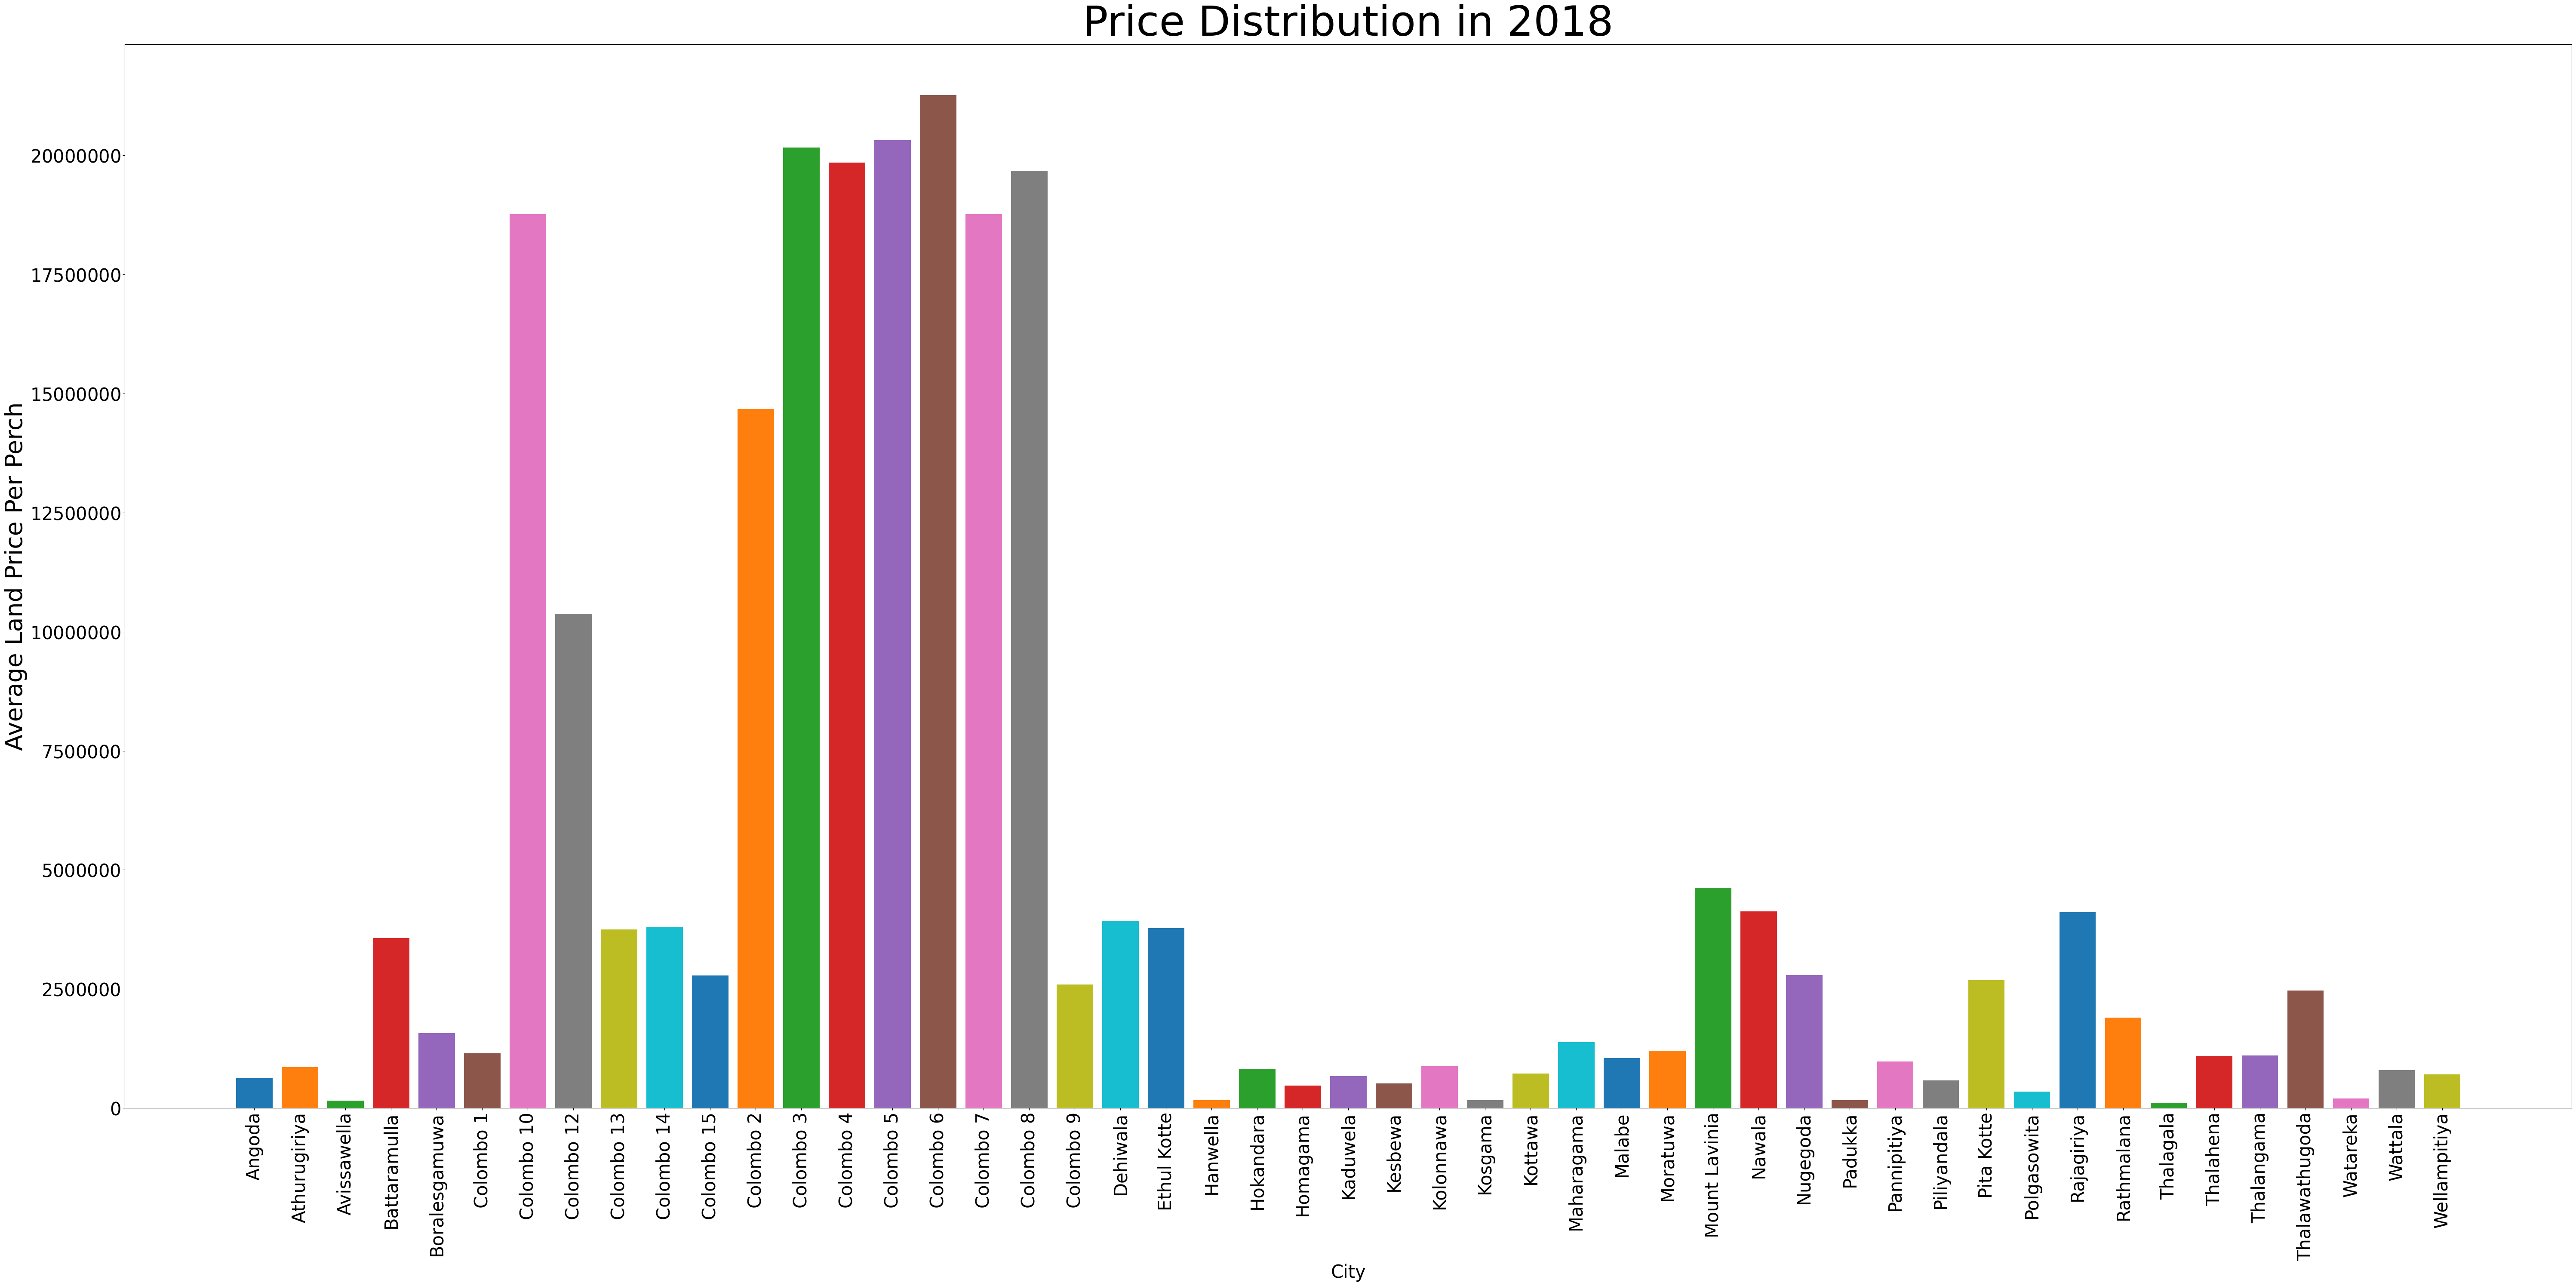

In [23]:
city_grouped_2018 = df_2018.groupby('main_city')

plt.figure(figsize=(60, 30)) 

for name, group in city_grouped_2018:
    filtered_data = group.dropna(subset=['price_land_pp'])
    plt.bar(name, filtered_data['price_land_pp'].mean())

plt.xlabel('City', fontsize=30)
plt.title('Price Distribution in 2018', fontsize=70)
plt.ylabel('Average Land Price Per Perch', fontsize=40)  

plt.xticks(rotation=90, fontsize=30)  

plt.yticks(fontsize=30)  

plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().ticklabel_format(style='plain', axis='y')

plt.tight_layout()  
plt.show()

### 2019 - Price distribution

In [24]:
df = zero_removed

df['posted_date'] = pd.to_datetime(df['posted_date'], format='%m/%d/%Y %H:%M')

df_2019 = df[(df['posted_date'] >= '01/01/2019') & (df['posted_date'] <= '31/12/2019')]

city_stats = df_2019.groupby('main_city')['price_land_pp'].agg(['min', 'max', 'mean', 'std', 'median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)])

city_stats.columns = ['min_price', 'max_price', 'mean_price', 'std_price', 'median_price', '25%_percentile', '75%_percentile']

city_stats.reset_index(inplace=True)

city_stats

main_city  min_price  max_price  mean_price  std_price  median_price   
0           Angoda    0.003Mn    1.500Mn     0.607Mn    0.369Mn       0.557Mn  \
1     Athurugiriya    0.004Mn   16.500Mn     0.745Mn    1.622Mn       0.525Mn   
2      Avissawella    0.007Mn    4.595Mn     0.413Mn    0.966Mn       0.225Mn   
3     Battaramulla    0.001Mn   54.000Mn     2.802Mn    4.211Mn       2.200Mn   
4    Boralesgamuwa    0.003Mn    7.308Mn     1.626Mn    1.095Mn       1.575Mn   
5        Colombo 1    0.300Mn   16.000Mn     3.461Mn    6.158Mn       1.300Mn   
6       Colombo 10    0.019Mn   22.000Mn     9.166Mn    5.620Mn       9.025Mn   
7       Colombo 12    1.833Mn    8.000Mn     4.917Mn    4.360Mn       4.917Mn   
8       Colombo 13    2.600Mn    6.000Mn     3.971Mn    0.966Mn       3.800Mn   
9       Colombo 14    5.000Mn   13.000Mn     8.360Mn    2.962Mn       7.500Mn   
10      Colombo 15    0.001Mn    5.000Mn     3.123Mn    1.292Mn       3.500Mn   
11       Colombo 2    0.013Mn   24.000Mn    14.174Mn    6.226Mn      16.000Mn   
12       Colombo 3    0.012Mn   57.000Mn    17.648Mn    6.867Mn      18.500Mn   
13       Colombo 4    0.010Mn  250.000Mn    24.467Mn   51.482Mn      14.000Mn   
14       Colombo 5    0.007Mn  600.000Mn    12.845Mn   43.757Mn       7.900Mn   
15       Colombo 6    1.650Mn  135.000Mn    12.006Mn   14.966Mn       9.900Mn   
16       Colombo 7    0.014Mn  400.000Mn    28.452Mn   66.721Mn      16.500Mn   
17       Colombo 8    0.000Mn  896.500Mn    28.968Mn  114.617Mn       9.000Mn   
18       Colombo 9    3.235Mn    5.500Mn     4.455Mn    0.769Mn       4.623Mn   
19        Dehiwala    0.003Mn   42.000Mn     4.017Mn    3.991Mn       3.200Mn   
20     Ethul Kotte    0.100Mn    4.743Mn     2.319Mn    0.804Mn       2.250Mn   
21        Hanwella    0.022Mn    0.900Mn     0.138Mn    0.178Mn       0.091Mn   
22       Hokandara    0.450Mn    1.875Mn     0.783Mn    0.305Mn       0.662Mn   
23        Homagama    0.000Mn    5.600Mn     0.414Mn    0.498Mn       0.305Mn   
24        Kaduwela    0.000Mn    5.000Mn     0.543Mn    0.789Mn       0.295Mn   
25     Kahathuduwa    0.165Mn    0.550Mn     0.338Mn    0.154Mn       0.335Mn   
26         Kesbewa    0.007Mn    1.500Mn     0.570Mn    0.272Mn       0.550Mn   
27       Kolonnawa    0.002Mn    3.150Mn     0.990Mn    0.661Mn       0.950Mn   
28         Kosgama    0.011Mn    0.550Mn     0.140Mn    0.145Mn       0.100Mn   
29         Kottawa    0.002Mn    4.000Mn     0.923Mn    0.722Mn       0.700Mn   
30      Maharagama    0.002Mn    5.500Mn     1.560Mn    0.907Mn       1.406Mn   
31          Malabe    0.001Mn   18.000Mn     1.295Mn    2.139Mn       0.875Mn   
32        Moratuwa    0.006Mn  105.932Mn     2.638Mn   11.643Mn       1.000Mn   
33   Mount Lavinia    0.500Mn   40.000Mn     3.891Mn    5.306Mn       2.800Mn   
34          Nawala    0.000Mn   10.000Mn     4.238Mn    1.724Mn       3.700Mn   
35        Nugegoda    0.003Mn  195.000Mn     3.716Mn   12.688Mn       2.600Mn   
36         Padukka    0.002Mn    1.000Mn     0.161Mn    0.183Mn       0.125Mn   
37     Pannipitiya    0.000Mn    3.000Mn     1.050Mn    0.551Mn       0.995Mn   
38     Piliyandala    0.001Mn    5.000Mn     0.647Mn    0.534Mn       0.575Mn   
39      Pita Kotte    1.000Mn   60.000Mn     3.047Mn    6.599Mn       2.200Mn   
40     Polgasowita    0.247Mn    0.550Mn     0.339Mn    0.083Mn       0.350Mn   
41      Rajagiriya    0.002Mn  120.575Mn     5.077Mn   10.477Mn       3.800Mn   
42      Rathmalana    0.002Mn   85.000Mn     3.951Mn   11.147Mn       1.900Mn   
43       Thalagala    0.125Mn    0.155Mn     0.141Mn    0.014Mn       0.142Mn   
44       Thalahena    0.495Mn   12.750Mn     2.340Mn    3.681Mn       1.225Mn   
45      Thalangama    0.005Mn    1.500Mn     0.752Mn    1.057Mn       0.752Mn   
46  Thalawathugoda    0.380Mn   35.000Mn     2.432Mn    3.884Mn       1.600Mn   
47        Watareka    0.130Mn    0.250Mn     0.169Mn    0.050Mn       0.145Mn   
48         Wattala    0.620Mn    0.620Mn

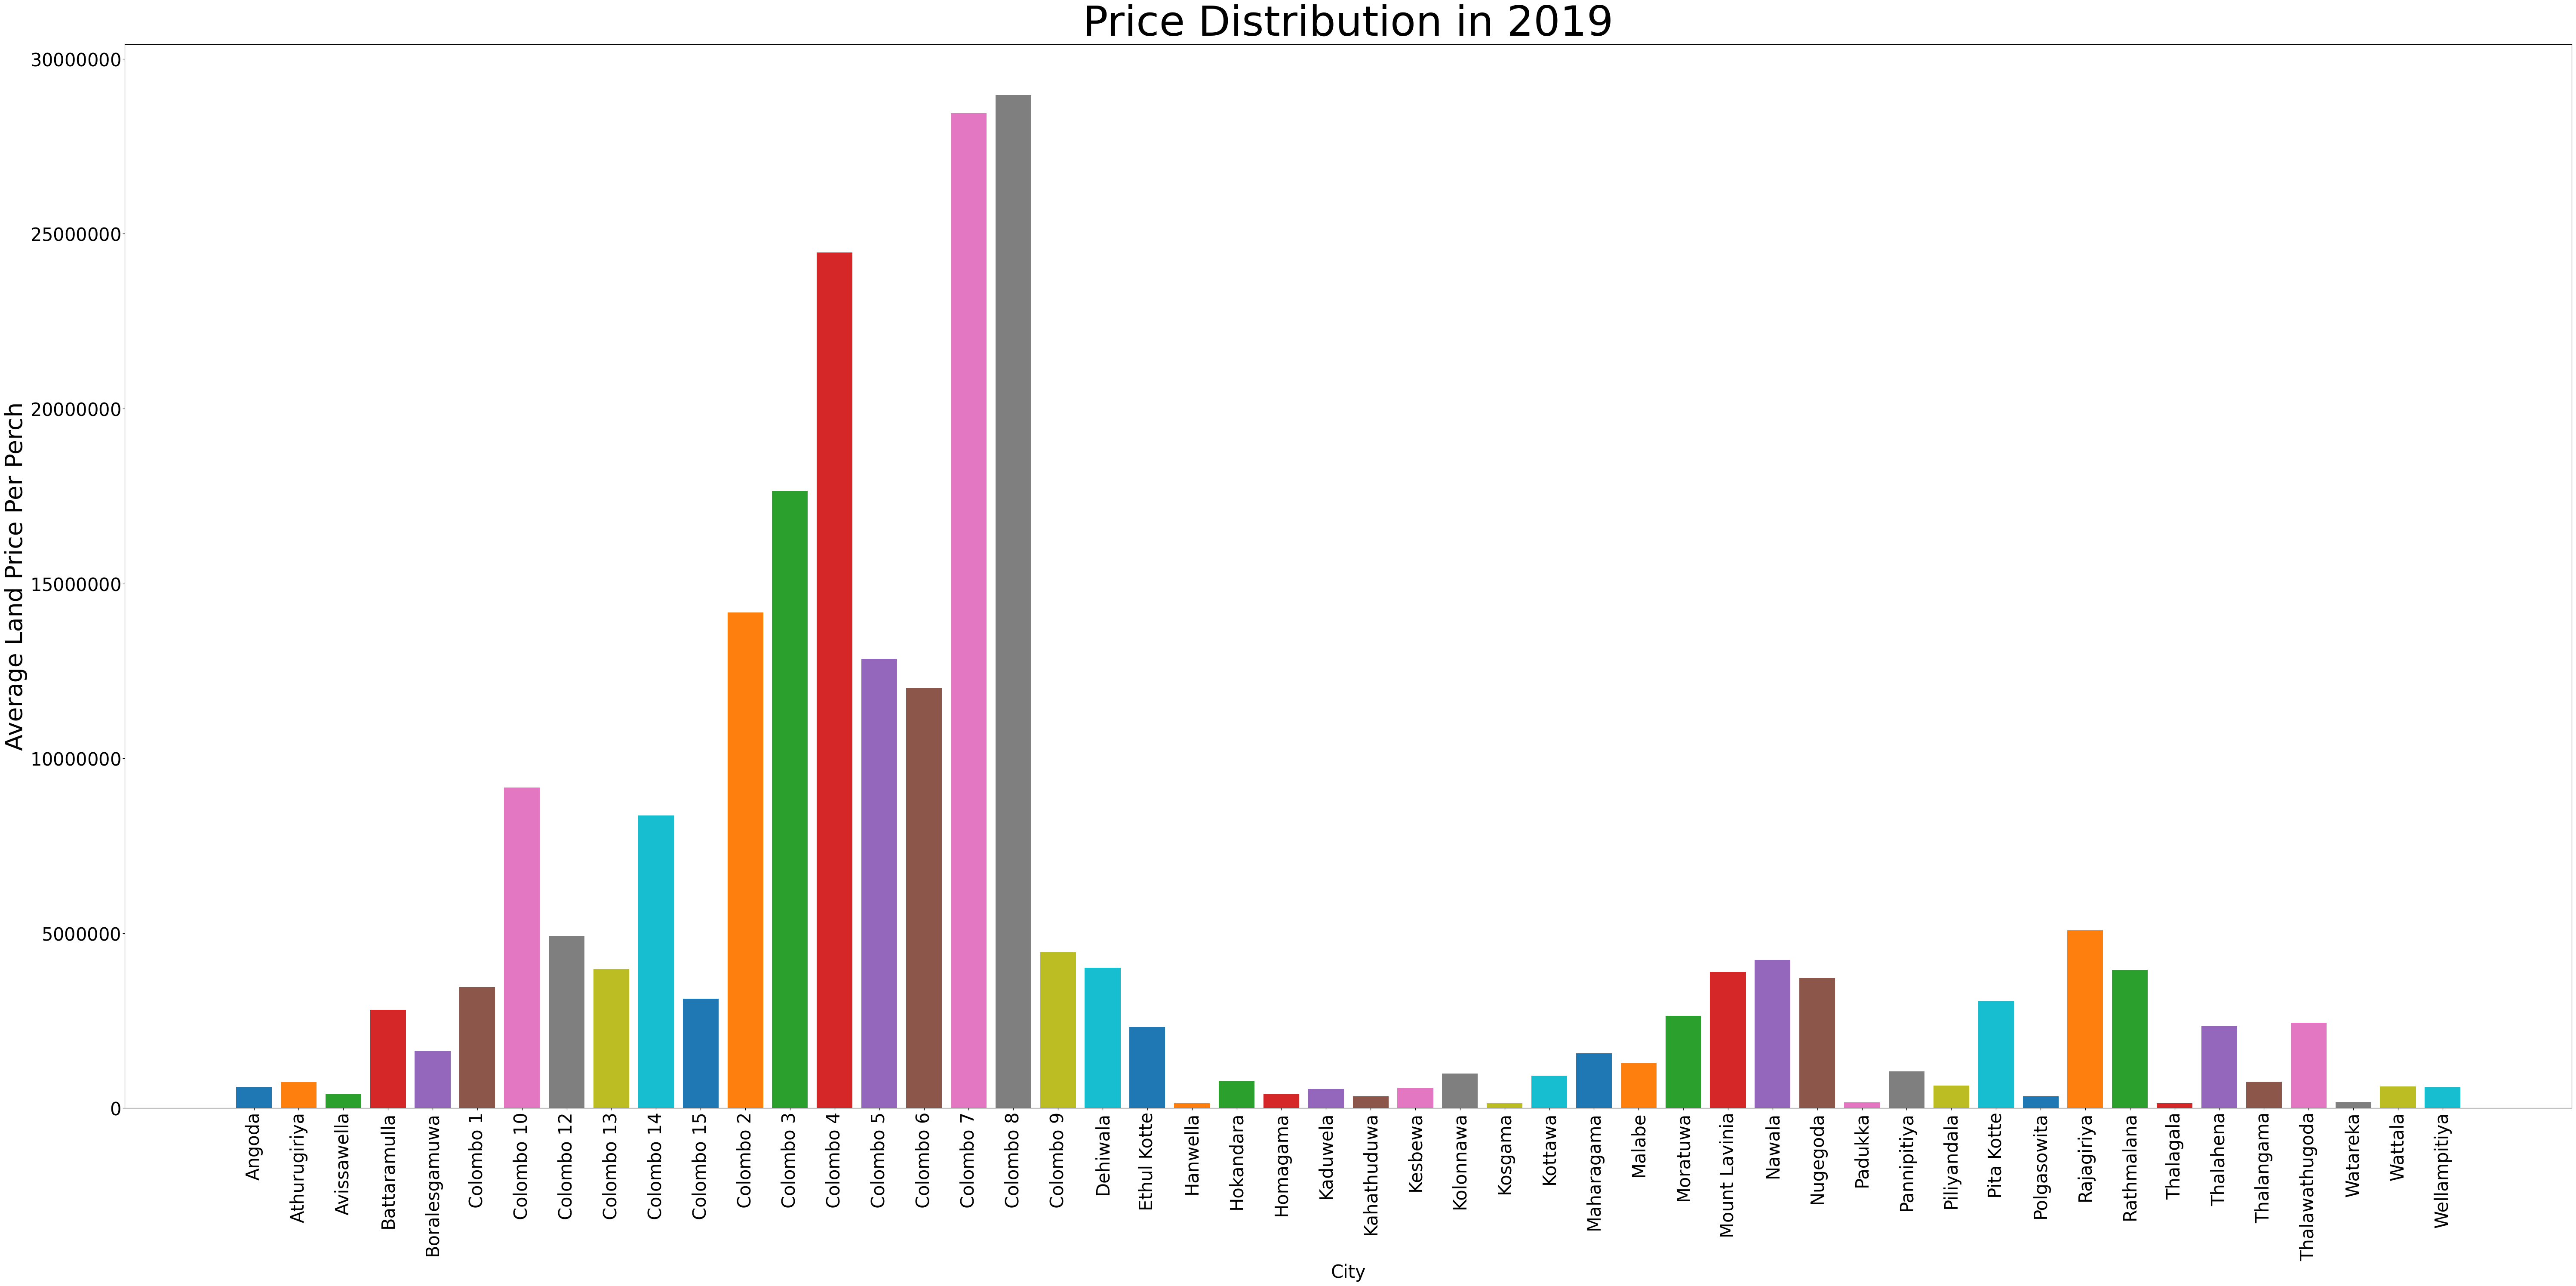

In [25]:
city_grouped_2019 = df_2019.groupby('main_city')

plt.figure(figsize=(60, 30)) 

for name, group in city_grouped_2019:
    filtered_data = group.dropna(subset=['price_land_pp'])
    plt.bar(name, filtered_data['price_land_pp'].mean())

plt.xlabel('City', fontsize=30)
plt.title('Price Distribution in 2019', fontsize=70)
plt.ylabel('Average Land Price Per Perch', fontsize=40)  

plt.xticks(rotation=90, fontsize=30)  

plt.yticks(fontsize=30)  

plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().ticklabel_format(style='plain', axis='y')

plt.tight_layout()  
plt.show()

### 2020 - Price distribution

In [26]:
df = zero_removed

df['posted_date'] = pd.to_datetime(df['posted_date'], format='%m/%d/%Y %H:%M')

df_2020 = df[(df['posted_date'] >= '01/01/2020') & (df['posted_date'] <= '31/12/2020')]

city_stats = df_2020.groupby('main_city')['price_land_pp'].agg(['min', 'max', 'mean', 'std', 'median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)])

city_stats.columns = ['min_price', 'max_price', 'mean_price', 'std_price', 'median_price', '25%_percentile', '75%_percentile']

city_stats.reset_index(inplace=True)

city_stats

main_city  min_price  max_price  mean_price  std_price  median_price   
0           Angoda    0.000Mn    1.873Mn     0.866Mn    0.568Mn       1.000Mn  \
1     Athurugiriya    0.000Mn    3.500Mn     0.703Mn    0.523Mn       0.595Mn   
2      Avissawella    0.005Mn    0.700Mn     0.180Mn    0.183Mn       0.133Mn   
3     Battaramulla    0.000Mn   60.000Mn     3.026Mn    4.729Mn       2.500Mn   
4    Boralesgamuwa    0.000Mn    5.000Mn     1.552Mn    0.758Mn       1.600Mn   
5        Colombo 1    0.000Mn   19.200Mn     5.795Mn    8.857Mn       0.225Mn   
6       Colombo 10    0.450Mn   27.000Mn    13.880Mn    7.870Mn      13.250Mn   
7       Colombo 12    4.000Mn   29.831Mn    11.304Mn    8.985Mn       7.500Mn   
8       Colombo 13    4.000Mn   18.300Mn     9.075Mn    6.311Mn       7.000Mn   
9       Colombo 14    3.000Mn    9.000Mn     6.073Mn    2.412Mn       6.486Mn   
10      Colombo 15    0.000Mn   10.000Mn     3.831Mn    1.839Mn       4.000Mn   
11       Colombo 2    1.500Mn   22.000Mn    14.077Mn    5.689Mn      16.000Mn   
12       Colombo 3    0.128Mn   57.000Mn    17.509Mn    8.706Mn      20.455Mn   
13       Colombo 4    0.110Mn   24.000Mn    12.127Mn    4.786Mn      12.500Mn   
14       Colombo 5    0.000Mn   46.500Mn     9.378Mn    6.121Mn       8.800Mn   
15       Colombo 6    0.000Mn   16.500Mn     8.299Mn    4.047Mn       8.000Mn   
16       Colombo 7    4.544Mn  330.000Mn    24.855Mn   52.751Mn      14.500Mn   
17       Colombo 8    0.000Mn  450.000Mn    21.868Mn   71.059Mn       8.000Mn   
18       Colombo 9    2.600Mn   16.667Mn     6.068Mn    4.845Mn       4.348Mn   
19        Dehiwala    0.020Mn   14.000Mn     3.652Mn    1.973Mn       3.300Mn   
20     Ethul Kotte    1.200Mn    8.000Mn     2.842Mn    1.070Mn       2.500Mn   
21        Hanwella    0.000Mn    6.000Mn     0.366Mn    1.058Mn       0.145Mn   
22       Hokandara    0.000Mn    1.800Mn     0.933Mn    0.421Mn       0.912Mn   
23        Homagama    0.000Mn    3.800Mn     0.503Mn    0.477Mn       0.400Mn   
24        Kaduwela    0.000Mn    3.500Mn     0.641Mn    0.562Mn       0.453Mn   
25     Kahathuduwa    0.182Mn    0.800Mn     0.403Mn    0.165Mn       0.415Mn   
26         Kesbewa    0.002Mn   11.500Mn     0.972Mn    2.117Mn       0.560Mn   
27       Kolonnawa    0.130Mn    2.950Mn     1.185Mn    0.752Mn       0.900Mn   
28         Kosgama    0.200Mn    0.700Mn     0.471Mn    0.244Mn       0.550Mn   
29         Kottawa    0.000Mn   14.500Mn     1.128Mn    1.498Mn       0.800Mn   
30      Maharagama    0.000Mn   65.000Mn     3.014Mn    7.539Mn       1.690Mn   
31          Malabe    0.075Mn    8.000Mn     1.243Mn    0.981Mn       1.000Mn   
32        Moratuwa    0.038Mn    2.500Mn     1.026Mn    0.463Mn       1.000Mn   
33   Mount Lavinia    0.350Mn    5.000Mn     2.661Mn    0.803Mn       2.600Mn   
34          Nawala    0.000Mn   26.000Mn     4.387Mn    2.462Mn       4.000Mn   
35        Nugegoda    0.000Mn   45.000Mn     3.702Mn    5.658Mn       2.600Mn   
36         Padukka    0.000Mn    3.500Mn     0.242Mn    0.578Mn       0.097Mn   
37     Pannipitiya    0.000Mn   11.000Mn     1.193Mn    1.204Mn       0.900Mn   
38     Piliyandala    0.000Mn    4.000Mn     0.786Mn    0.690Mn       0.650Mn   
39      Pita Kotte    0.000Mn    4.743Mn     2.425Mn    0.910Mn       2.400Mn   
40     Polgasowita    0.090Mn    0.684Mn     0.449Mn    0.192Mn       0.517Mn   
41      Rajagiriya    0.000Mn   40.000Mn     4.358Mn    3.830Mn       3.800Mn   
42      Rathmalana    0.000Mn   30.000Mn     3.304Mn    5.887Mn       1.725Mn   
43       Thalagala    0.125Mn    4.000Mn     1.417Mn    2.237Mn       0.125Mn   
44       Thalahena    0.900Mn    2.200Mn     1.311Mn    0.462Mn       1.100Mn   
45      Thalangama    1.250Mn    1.900Mn     1.575Mn    0.460Mn       1.575Mn   
46  Thalawathugoda    0.000Mn   18.000Mn     1.907Mn    1.621Mn       1.600Mn   
47        Watareka    0.400Mn    1.233Mn     0.794Mn    0.418Mn       0.750Mn   
48    Wellampitiya    0.575Mn    3.000Mn

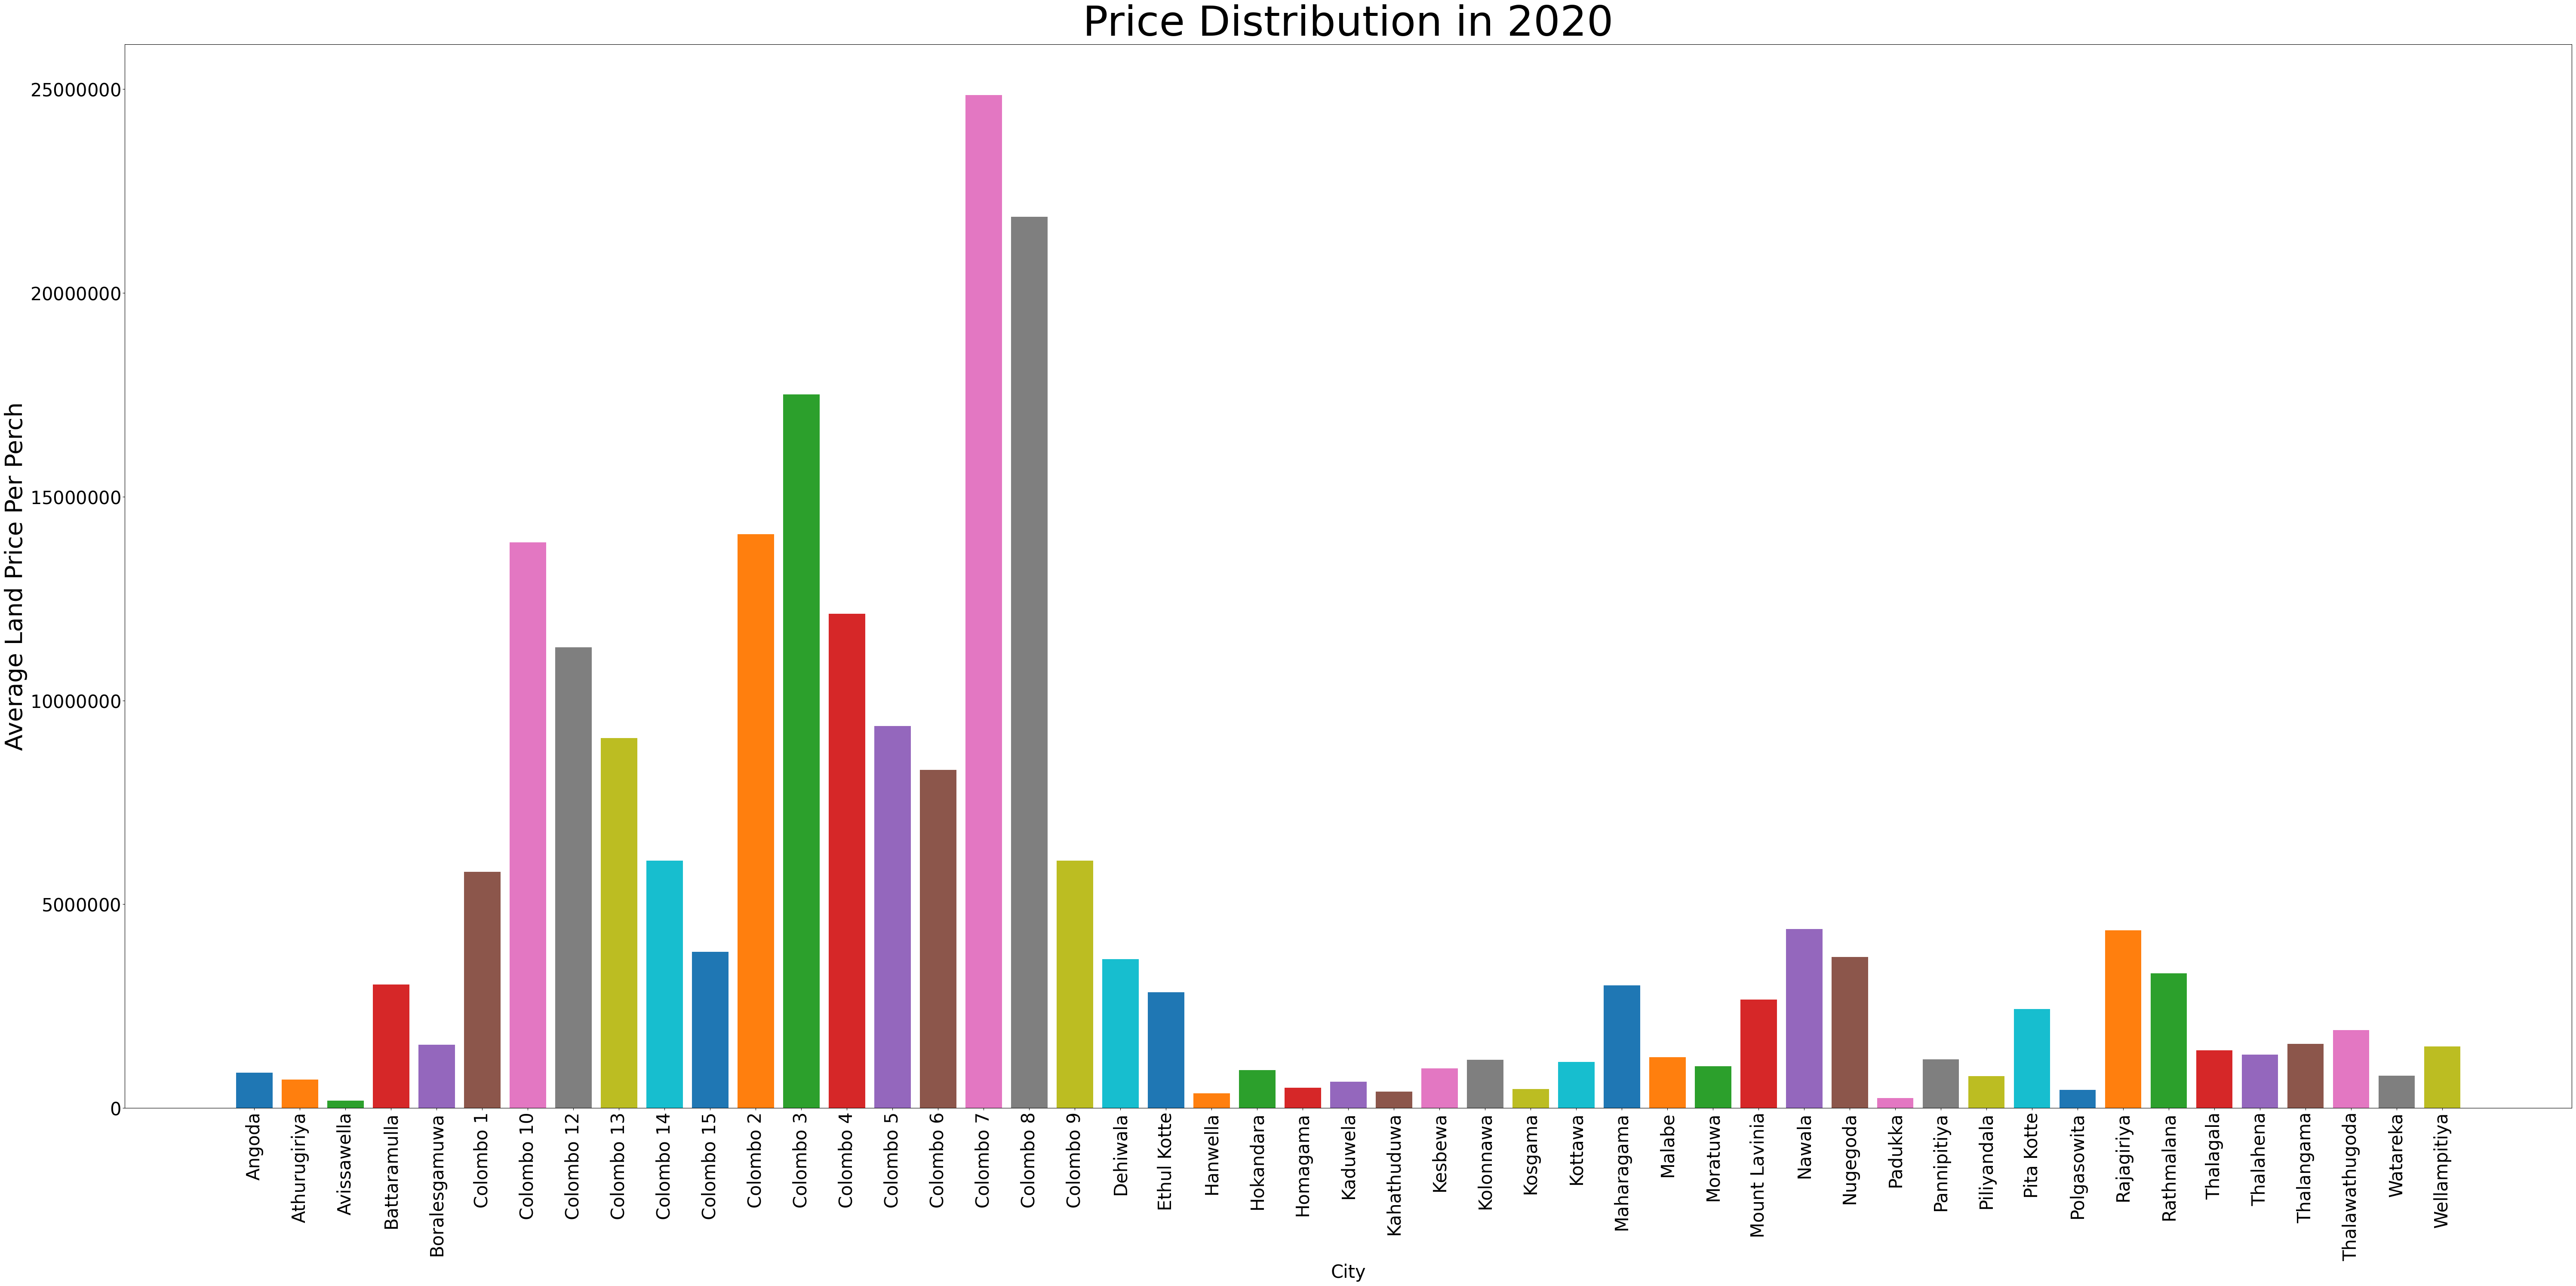

In [27]:
city_grouped_2020 = df_2020.groupby('main_city')

plt.figure(figsize=(60, 30)) 

for name, group in city_grouped_2020:
    filtered_data = group.dropna(subset=['price_land_pp'])
    plt.bar(name, filtered_data['price_land_pp'].mean())

plt.xlabel('City', fontsize=30)
plt.title('Price Distribution in 2020', fontsize=70)
plt.ylabel('Average Land Price Per Perch', fontsize=40)  

plt.xticks(rotation=90, fontsize=30)  

plt.yticks(fontsize=30)  

plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().ticklabel_format(style='plain', axis='y')

plt.tight_layout()  
plt.show()

### 2021 - Price distribution

In [28]:
df = zero_removed

df['posted_date'] = pd.to_datetime(df['posted_date'], format='%m/%d/%Y %H:%M')

df_2021 = df[(df['posted_date'] >= '01/01/2021') & (df['posted_date'] <= '31/12/2021')]

city_stats = df_2021.groupby('main_city')['price_land_pp'].agg(['min', 'max', 'mean', 'std', 'median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)])

city_stats.columns = ['min_price', 'max_price', 'mean_price', 'std_price', 'median_price', '25%_percentile', '75%_percentile']

city_stats.reset_index(inplace=True)

city_stats

main_city  min_price  max_price  mean_price  std_price  median_price   
0           Angoda    0.525Mn    3.500Mn     1.226Mn    0.715Mn       1.000Mn  \
1     Athurugiriya    0.000Mn    4.000Mn     0.692Mn    0.453Mn       0.613Mn   
2      Avissawella    0.004Mn    0.500Mn     0.206Mn    0.128Mn       0.200Mn   
3     Battaramulla    0.000Mn   80.000Mn     3.473Mn    5.076Mn       2.700Mn   
4    Boralesgamuwa    0.002Mn   80.000Mn     3.141Mn    7.708Mn       1.850Mn   
5        Colombo 1    0.000Mn   40.000Mn    12.384Mn   12.552Mn       9.150Mn   
6       Colombo 10    0.129Mn   27.000Mn    15.884Mn   11.089Mn      21.000Mn   
7       Colombo 12    3.168Mn   23.474Mn    12.024Mn    7.040Mn       8.000Mn   
8       Colombo 13    0.002Mn   17.500Mn     5.893Mn    6.304Mn       4.815Mn   
9       Colombo 14    1.000Mn    9.000Mn     6.598Mn    2.758Mn       7.965Mn   
10      Colombo 15    0.050Mn    7.222Mn     3.527Mn    1.567Mn       3.500Mn   
11       Colombo 2    0.010Mn  100.000Mn    23.373Mn   20.695Mn      20.000Mn   
12       Colombo 3    2.300Mn  162.000Mn    20.153Mn   15.335Mn      18.000Mn   
13       Colombo 4    0.330Mn   25.000Mn    14.902Mn    4.232Mn      15.000Mn   
14       Colombo 5    0.000Mn  270.000Mn    10.121Mn   18.155Mn       7.500Mn   
15       Colombo 6    0.438Mn 1650.000Mn    22.740Mn  146.388Mn       7.950Mn   
16       Colombo 7    0.043Mn   25.000Mn    17.000Mn    4.623Mn      17.500Mn   
17       Colombo 8    0.360Mn  105.000Mn     9.863Mn   10.511Mn       7.900Mn   
18       Colombo 9    0.200Mn  850.000Mn    49.237Mn  193.933Mn       4.620Mn   
19        Dehiwala    0.000Mn   74.000Mn     5.857Mn    8.760Mn       4.000Mn   
20     Ethul Kotte    0.050Mn    5.500Mn     3.023Mn    0.915Mn       2.825Mn   
21        Hanwella    0.001Mn    0.650Mn     0.206Mn    0.145Mn       0.170Mn   
22       Hokandara    0.001Mn    2.903Mn     1.289Mn    0.651Mn       1.200Mn   
23        Homagama    0.000Mn    2.500Mn     0.509Mn    0.368Mn       0.375Mn   
24        Kaduwela    0.000Mn    5.750Mn     0.475Mn    0.446Mn       0.450Mn   
25     Kahathuduwa    0.180Mn    1.800Mn     0.546Mn    0.303Mn       0.475Mn   
26         Kesbewa    0.100Mn    1.200Mn     0.877Mn    0.099Mn       0.900Mn   
27       Kolonnawa    0.014Mn    6.250Mn     1.536Mn    1.359Mn       1.300Mn   
28         Kosgama    0.095Mn    0.315Mn     0.215Mn    0.077Mn       0.214Mn   
29         Kottawa    0.000Mn    9.500Mn     1.444Mn    1.221Mn       1.025Mn   
30      Maharagama    0.000Mn   33.000Mn     3.006Mn    3.460Mn       2.100Mn   
31          Malabe    0.000Mn   32.400Mn     1.820Mn    2.924Mn       1.400Mn   
32        Moratuwa    0.008Mn   18.500Mn     1.683Mn    1.848Mn       1.488Mn   
33   Mount Lavinia    1.700Mn  320.000Mn     5.953Mn   25.849Mn       2.825Mn   
34          Nawala    0.000Mn   80.000Mn     5.596Mn    7.622Mn       4.500Mn   
35        Nugegoda    0.000Mn  260.000Mn     4.355Mn   13.573Mn       3.500Mn   
36         Padukka    0.010Mn    0.550Mn     0.169Mn    0.142Mn       0.125Mn   
37     Pannipitiya    0.000Mn  570.000Mn     6.541Mn   53.247Mn       1.450Mn   
38     Piliyandala    0.055Mn   15.000Mn     1.011Mn    1.050Mn       0.895Mn   
39      Pita Kotte    1.150Mn    6.800Mn     3.128Mn    1.033Mn       2.900Mn   
40     Polgasowita    0.100Mn    3.000Mn     1.470Mn    1.217Mn       0.875Mn   
41      Rajagiriya    0.000Mn   12.500Mn     4.889Mn    2.492Mn       4.500Mn   
42      Rathmalana    0.074Mn   20.000Mn     2.896Mn    2.303Mn       2.500Mn   
43       Thalahena    0.900Mn    5.500Mn     1.947Mn    1.180Mn       1.750Mn   
44      Thalangama    1.300Mn    2.500Mn     1.984Mn    0.369Mn       2.000Mn   
45  Thalawathugoda    0.077Mn    6.500Mn     2.158Mn    1.220Mn       2.000Mn   
46        Watareka    0.000Mn    0.180Mn     0.090Mn    0.127Mn       0.090Mn   
47         Wattala    0.800Mn    0.800Mn     0.800Mn        NaN       0.800Mn   
48    Wellampitiya    0.345Mn    2.650Mn

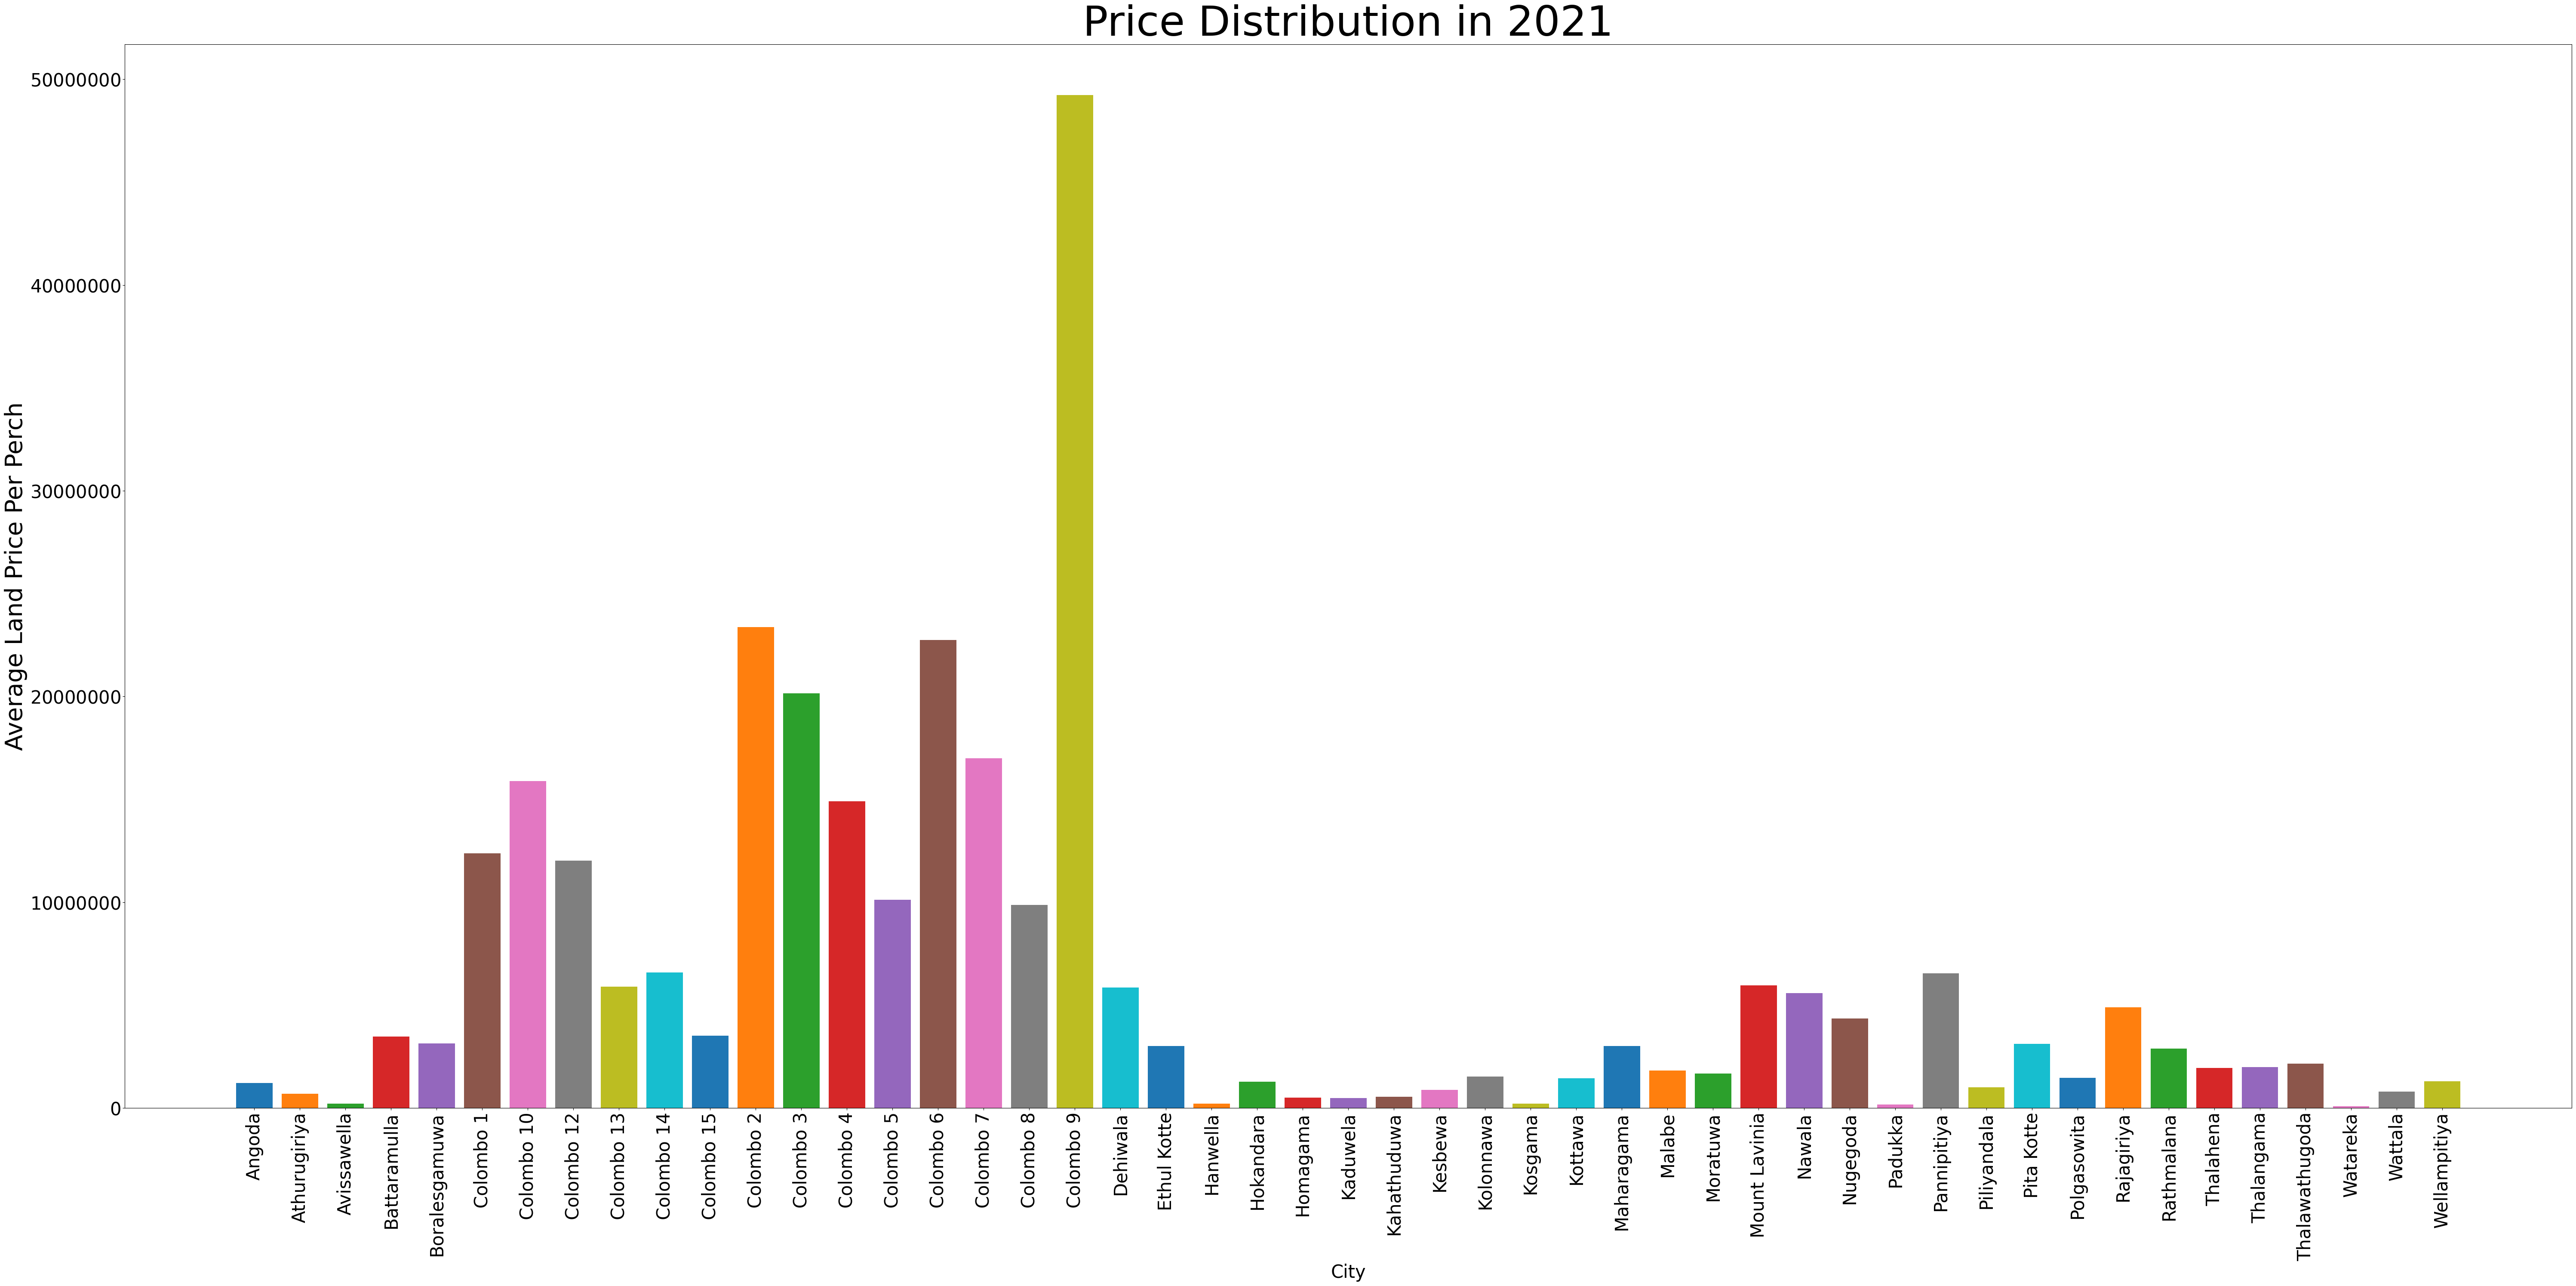

In [29]:
city_grouped_2021 = df_2021.groupby('main_city')

plt.figure(figsize=(60, 30)) 

for name, group in city_grouped_2021:
    filtered_data = group.dropna(subset=['price_land_pp'])
    plt.bar(name, filtered_data['price_land_pp'].mean())

plt.xlabel('City', fontsize=30)
plt.title('Price Distribution in 2021', fontsize=70)
plt.ylabel('Average Land Price Per Perch', fontsize=40)  

plt.xticks(rotation=90, fontsize=30)  

plt.yticks(fontsize=30)  

plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().ticklabel_format(style='plain', axis='y')

plt.tight_layout()  
plt.show()

### 2022 - Price distribution

In [30]:
df = zero_removed

df['posted_date'] = pd.to_datetime(df['posted_date'], format='%m/%d/%Y')

df_2022 = df[(df['posted_date'] >= '01/01/2022') & (df['posted_date'] <= '31/12/2022')]

city_stats = df_2022.groupby('main_city')['price_land_pp'].agg(['min', 'max', 'mean', 'std', 'median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)])

city_stats.columns = ['min_price', 'max_price', 'mean_price', 'std_price', 'median_price', '25%_percentile', '75%_percentile']

city_stats.reset_index(inplace=True)

city_stats

main_city  min_price   max_price  mean_price  std_price   
0           Angoda    0.002Mn     3.000Mn     1.363Mn    0.577Mn  \
1     Athurugiriya    0.002Mn    33.600Mn     1.372Mn    2.249Mn   
2      Avissawella    0.000Mn   250.000Mn     9.487Mn   44.430Mn   
3     Battaramulla    0.000Mn   180.000Mn     5.507Mn   15.814Mn   
4    Boralesgamuwa    0.210Mn    16.500Mn     2.553Mn    2.789Mn   
5        Colombo 1    0.000Mn   172.000Mn     2.434Mn   14.159Mn   
6       Colombo 10    0.108Mn    25.065Mn     1.936Mn    4.632Mn   
7       Colombo 12    0.000Mn    23.474Mn    10.071Mn    7.697Mn   
8       Colombo 13    0.145Mn    15.000Mn     6.311Mn    4.212Mn   
9       Colombo 14    0.650Mn    12.000Mn     6.435Mn    2.967Mn   
10      Colombo 15    1.600Mn     6.500Mn     4.147Mn    1.402Mn   
11       Colombo 2    0.010Mn  1219.000Mn    61.417Mn  208.846Mn   
12       Colombo 3    0.800Mn   145.000Mn    20.472Mn   11.569Mn   
13       Colombo 4    3.000Mn    32.000Mn    18.073Mn    6.112Mn   
14       Colombo 5    0.000Mn   420.000Mn    13.575Mn   31.263Mn   
15       Colombo 6    0.150Mn  1650.000Mn    28.922Mn  160.280Mn   
16       Colombo 7    0.007Mn    26.000Mn    15.817Mn    6.086Mn   
17       Colombo 8    0.000Mn   434.000Mn    21.888Mn   60.633Mn   
18       Colombo 9    2.100Mn    94.250Mn    24.821Mn   36.752Mn   
19        Dehiwala    0.001Mn 10000.000Mn    33.275Mn  525.370Mn   
20     Ethul Kotte    1.650Mn    76.500Mn     4.500Mn    7.362Mn   
21        Hanwella    0.037Mn   113.333Mn     1.025Mn    8.247Mn   
22       Hokandara    0.000Mn    21.600Mn     2.322Mn    4.283Mn   
23        Homagama    0.004Mn    11.000Mn     0.713Mn    0.568Mn   
24        Kaduwela    0.002Mn     8.983Mn     0.344Mn    0.544Mn   
25     Kahathuduwa    0.004Mn     6.300Mn     0.674Mn    0.705Mn   
26         Kesbewa    0.270Mn     5.000Mn     0.881Mn    0.373Mn   
27       Kolonnawa    0.135Mn     3.496Mn     1.772Mn    0.924Mn   
28         Kosgama    0.140Mn     0.980Mn     0.301Mn    0.225Mn   
29         Kottawa    0.145Mn     5.700Mn     1.450Mn    0.551Mn   
30      Maharagama    0.096Mn    22.500Mn     2.702Mn    2.663Mn   
31          Malabe    0.000Mn   100.000Mn     2.997Mn    8.398Mn   
32        Moratuwa    0.002Mn    16.500Mn     2.108Mn    2.305Mn   
33   Mount Lavinia    0.000Mn    58.000Mn     4.089Mn    5.116Mn   
34          Nawala    0.350Mn   153.000Mn    10.084Mn   23.064Mn   
35        Nugegoda    0.006Mn   163.400Mn     7.291Mn   16.472Mn   
36         Padukka    0.002Mn     4.500Mn     0.331Mn    0.312Mn   
37     Pannipitiya    0.135Mn    19.800Mn     2.009Mn    1.473Mn   
38     Piliyandala    0.001Mn    83.000Mn     1.666Mn    6.716Mn   
39      Pita Kotte    0.118Mn    61.000Mn     4.603Mn    7.480Mn   
40     Polgasowita    0.135Mn     3.000Mn     0.559Mn    0.379Mn   
41      Rajagiriya    0.037Mn   190.000Mn     8.241Mn   22.621Mn   
42      Rathmalana    0.007Mn    10.000Mn     2.626Mn    1.384Mn   
43       Thalagala    0.550Mn     3.900Mn     0.992Mn    1.026Mn   
44       Thalahena    0.875Mn     5.500Mn     2.124Mn    1.351Mn   
45      Thalangama    0.150Mn    35.000Mn     5.193Mn    9.951Mn   
46  Thalawathugoda    0.011Mn   320.000Mn     5.319Mn   26.061Mn   
47        Watareka    0.057Mn     2.625Mn     0.449Mn    0.274Mn   
48         Wattala    0.911Mn     2.095Mn     1.502Mn    0.592Mn   
49    Wellampitiya    0.250Mn  2700.000Mn   247.062Mn  813.549Mn   

    median_price  25%_percentile  75%_percentile  
0        1.300Mn         1.025Mn         1.689Mn  
1        1.025Mn         0.925Mn         1.200Mn  
2        0.174Mn         0.139Mn         0.220Mn  
3        3.000Mn         2.264Mn         4.300Mn  
4        2.000Mn         1.550Mn         2.400Mn  
5        0.657Mn         0.280Mn         2.000Mn  
6        0.650Mn         0.608Mn         0.650Mn  
7        8.725Mn         7.612Mn        11.375Mn  
8        6.000Mn         4.150Mn         8.438Mn  
9        6.500Mn         5.375

In [31]:
city_grouped_2022 = df_2022.groupby('main_city')

plt.figure(figsize=(60, 30)) 

for name, group in city_grouped_2022:
    filtered_data = group.dropna(subset=['price_land_pp'])
    plt.bar(name, filtered_data['price_land_pp'].mean())

plt.xlabel('City', fontsize=30)
plt.title('Price Distribution in 2022', fontsize=70)
plt.ylabel('Average Land Price Per Perch', fontsize=40)  

plt.xticks(rotation=90, fontsize=30)  

plt.yticks(fontsize=30)  

plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().ticklabel_format(style='plain', axis='y')

plt.tight_layout()  
plt.show()

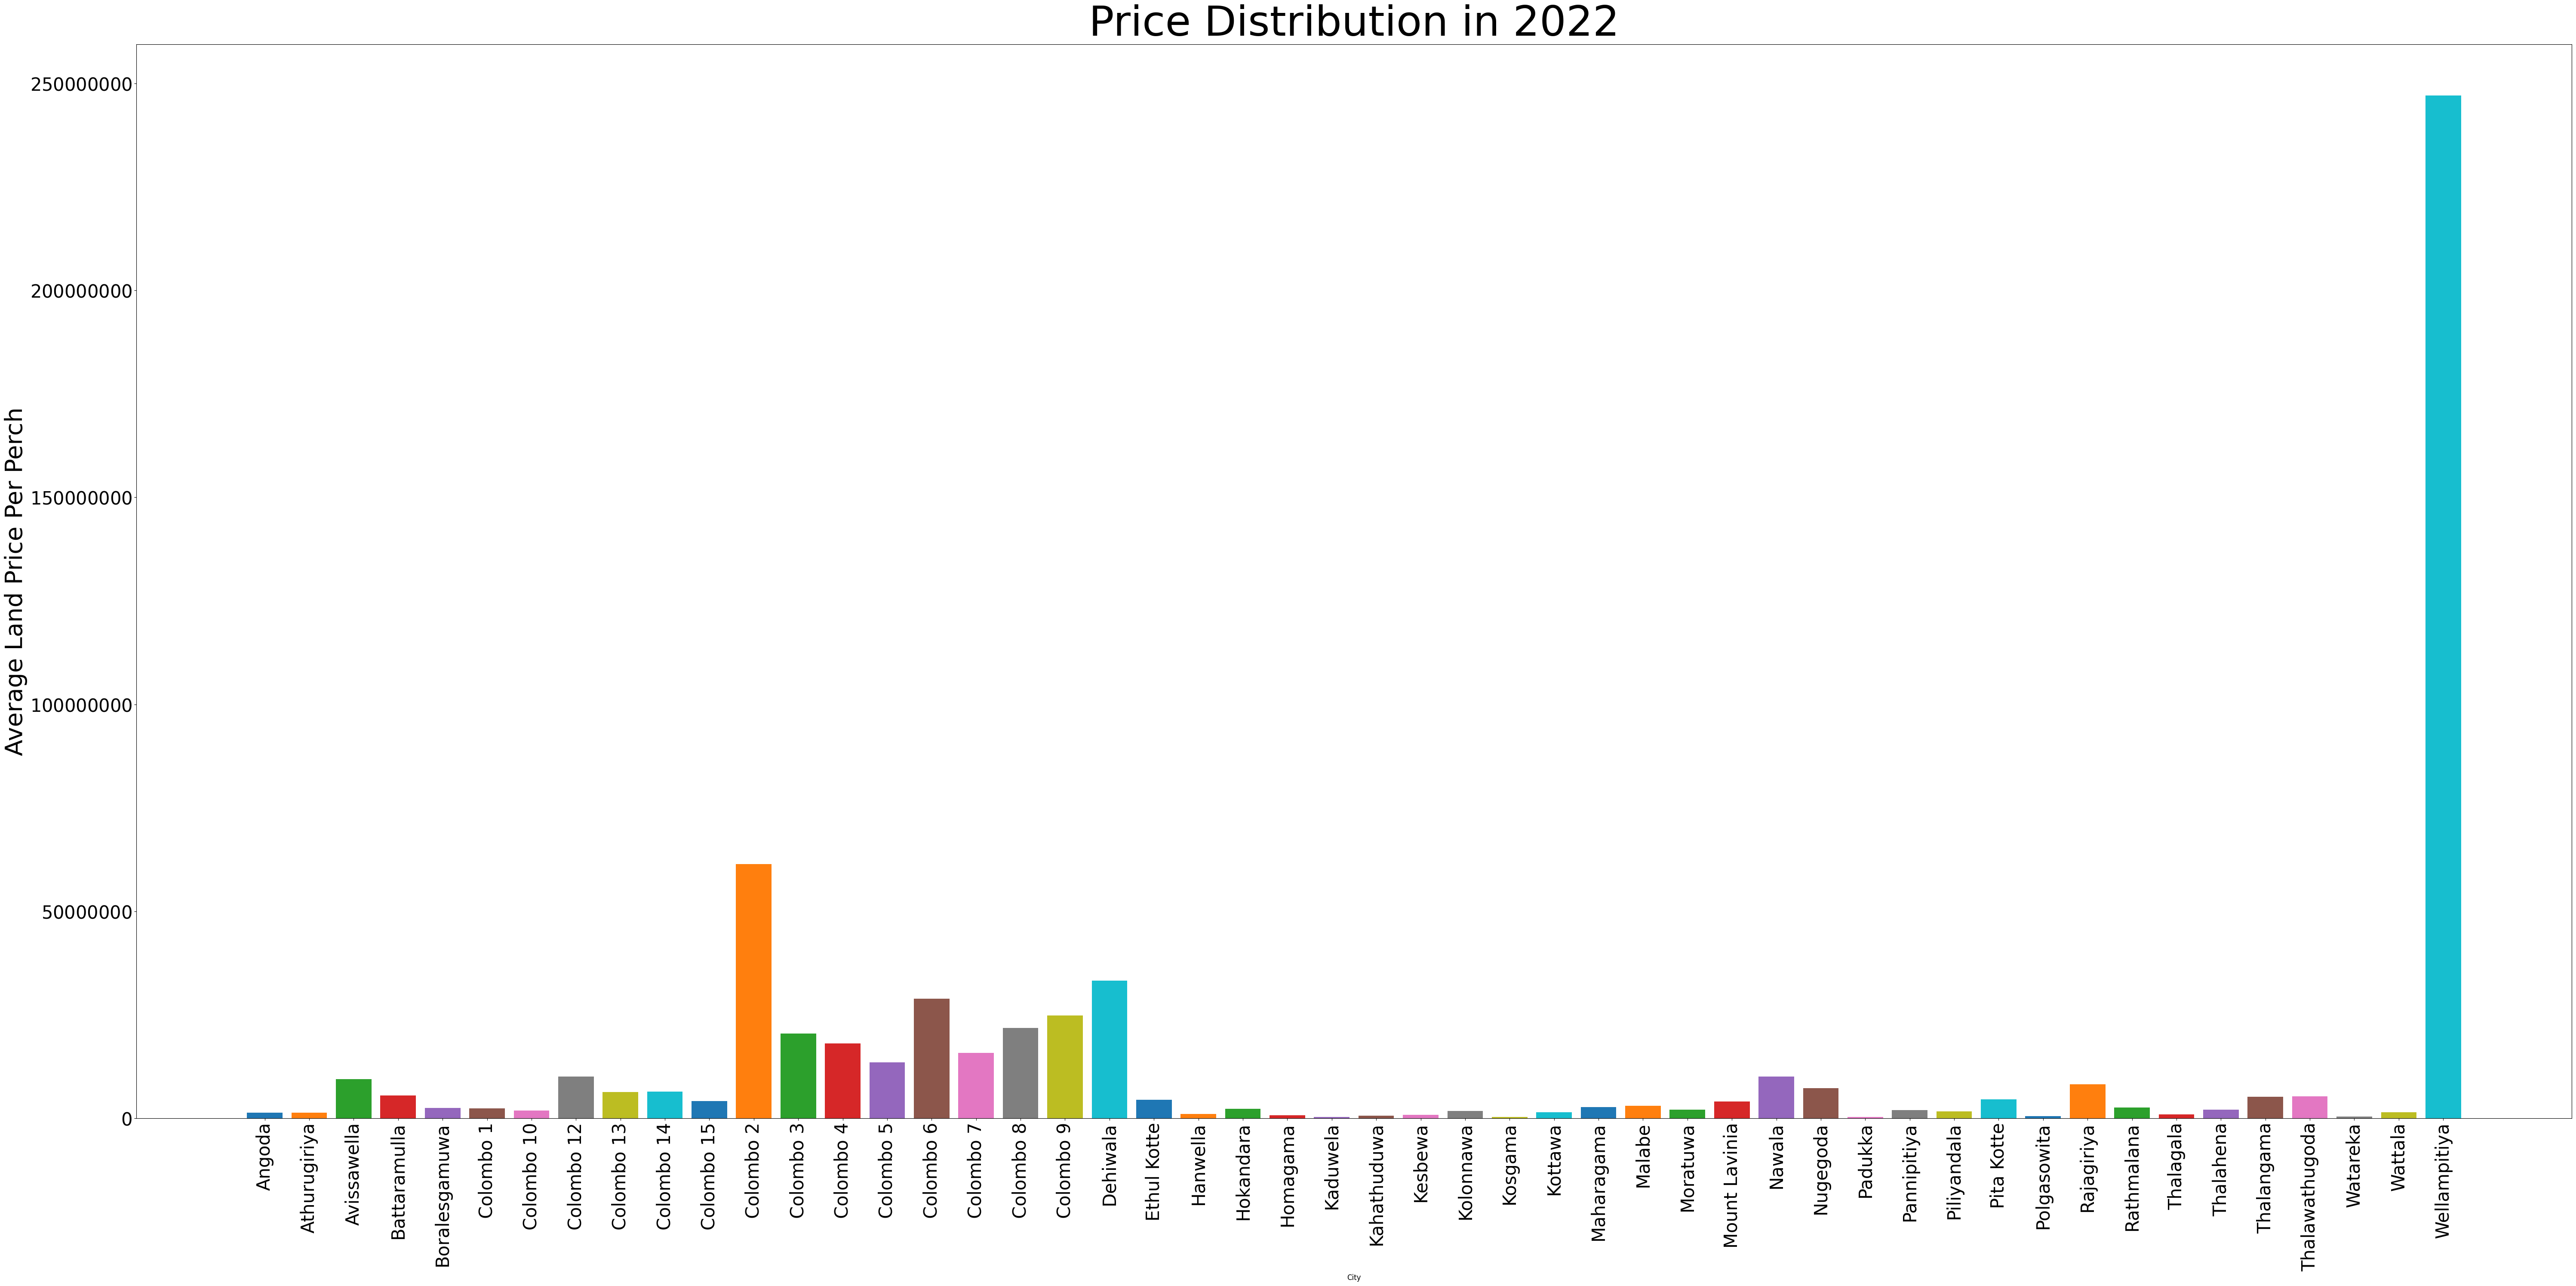

In [32]:
filtered_data_2022 = df_2022[(df_2022['main_city'] != 'wellampitiya')]

city_grouped_2022 = filtered_data_2022.groupby('main_city')

plt.figure(figsize=(60, 30))  

for name, group in city_grouped_2022:
    filtered_data = group.dropna(subset=['price_land_pp'])
    plt.bar(name, filtered_data['price_land_pp'].mean())

plt.xlabel('City', fontsize=12)
plt.title('Price Distribution in 2022', fontsize=70)  
plt.ylabel('Average Land Price Per Perch', fontsize=40)

plt.xticks(rotation=90, fontsize=30)
plt.yticks(fontsize=30)

plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

### 2023 - Price distribution

In [33]:
df = zero_removed

df['posted_date'] = pd.to_datetime(df['posted_date'], format='%m/%d/%Y')

df_2023 = df[(df['posted_date'] >= '01/01/2023') & (df['posted_date'] <= '31/12/2023')]

city_stats = df_2023.groupby('main_city')['price_land_pp'].agg(['min', 'max', 'mean', 'std', 'median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)])

city_stats.columns = ['min_price', 'max_price', 'mean_price', 'std_price', 'median_price', '25%_percentile', '75%_percentile']

city_stats.reset_index(inplace=True)

city_stats

main_city  min_price   max_price  mean_price  std_price   
0           Angoda    0.180Mn     4.500Mn     1.231Mn    1.009Mn  \
1     Athurugiriya    0.002Mn    22.000Mn     1.349Mn    2.562Mn   
2      Avissawella    0.013Mn   200.000Mn     5.260Mn   29.923Mn   
3     Battaramulla    0.050Mn   305.000Mn    10.005Mn   26.853Mn   
4    Boralesgamuwa    0.175Mn   120.000Mn     5.974Mn   15.296Mn   
5        Colombo 1    0.009Mn    19.124Mn     0.611Mn    1.432Mn   
6       Colombo 10    0.086Mn   181.000Mn     3.467Mn   17.412Mn   
7       Colombo 12  100.000Mn   100.000Mn   100.000Mn        NaN   
8       Colombo 13    4.000Mn    18.300Mn     7.525Mn    4.300Mn   
9       Colombo 14    6.000Mn  1300.000Mn   224.850Mn  422.904Mn   
10      Colombo 15    2.000Mn     6.000Mn     4.309Mn    1.162Mn   
11       Colombo 2    0.434Mn   450.500Mn    53.697Mn  114.679Mn   
12       Colombo 3    0.003Mn  1100.000Mn    69.165Mn  174.356Mn   
13       Colombo 4    0.300Mn   270.000Mn    21.806Mn   33.683Mn   
14       Colombo 5    1.000Mn  6500.000Mn    61.882Mn  514.476Mn   
15       Colombo 6    0.037Mn 16000.000Mn   191.133Mn 1685.173Mn   
16       Colombo 7    0.300Mn  1000.000Mn    61.050Mn  181.034Mn   
17       Colombo 8    0.029Mn   330.000Mn    24.880Mn   64.526Mn   
18       Colombo 9    0.300Mn   325.000Mn    38.430Mn   67.583Mn   
19        Dehiwala    0.045Mn   369.000Mn    10.857Mn   29.722Mn   
20     Ethul Kotte    2.000Mn    35.000Mn     4.087Mn    3.752Mn   
21        Hanwella    0.050Mn    10.000Mn     0.400Mn    0.849Mn   
22       Hokandara    0.134Mn    50.000Mn     3.183Mn    6.816Mn   
23        Homagama    0.004Mn     9.500Mn     0.699Mn    0.581Mn   
24        Kaduwela    0.100Mn    65.000Mn     0.742Mn    2.903Mn   
25     Kahathuduwa    0.125Mn     6.500Mn     0.545Mn    0.327Mn   
26         Kesbewa    0.090Mn     3.350Mn     0.686Mn    0.344Mn   
27       Kolonnawa    0.111Mn     2.500Mn     1.691Mn    0.716Mn   
28         Kosgama    0.100Mn     0.368Mn     0.200Mn    0.080Mn   
29         Kottawa    0.100Mn   720.000Mn     5.502Mn   54.806Mn   
30      Maharagama    0.190Mn   195.000Mn     4.631Mn   15.240Mn   
31          Malabe    0.070Mn   550.000Mn     5.416Mn   31.318Mn   
32        Moratuwa    0.160Mn    85.000Mn     3.198Mn    9.835Mn   
33   Mount Lavinia    0.310Mn   150.000Mn     7.119Mn   15.862Mn   
34          Nawala    0.250Mn   357.500Mn    16.188Mn   49.129Mn   
35        Nugegoda    0.225Mn   270.000Mn    11.439Mn   29.388Mn   
36         Padukka    0.000Mn    10.500Mn     0.327Mn    0.469Mn   
37     Pannipitiya    0.020Mn    19.000Mn     1.775Mn    1.918Mn   
38     Piliyandala    0.086Mn    83.000Mn     0.850Mn    1.913Mn   
39      Pita Kotte    0.194Mn  3000.000Mn    32.357Mn  278.220Mn   
40     Polgasowita    0.065Mn    10.000Mn     0.513Mn    0.560Mn   
41      Rajagiriya    0.150Mn 16750.000Mn   107.939Mn 1160.168Mn   
42      Rathmalana    0.060Mn    25.000Mn     2.990Mn    3.099Mn   
43       Thalagala    0.190Mn     0.550Mn     0.412Mn    0.159Mn   
44       Thalahena    1.550Mn     3.100Mn     1.933Mn    0.593Mn   
45      Thalangama    1.600Mn     6.667Mn     3.122Mn    1.141Mn   
46  Thalawathugoda    0.110Mn   305.000Mn    15.511Mn   55.224Mn   
47        Watareka    0.055Mn     2.700Mn     0.511Mn    0.265Mn   
48         Wattala    1.500Mn     2.000Mn     1.667Mn    0.289Mn   
49    Wellampitiya    0.800Mn     4.950Mn     2.040Mn    1.594Mn   

    median_price  25%_percentile  75%_percentile  
0        0.887Mn         0.550Mn         1.374Mn  
1        0.850Mn         0.675Mn         1.100Mn  
2        0.200Mn         0.139Mn         0.217Mn  
3        3.500Mn         2.500Mn         5.000Mn  
4        2.200Mn         1.750Mn         2.800Mn  
5        0.500Mn         0.430Mn         0.590Mn  
6        0.600Mn         0.600Mn         0.650Mn  
7      100.000Mn       100.000Mn       100.000Mn  
8        5.500Mn         5.000Mn         7.875Mn  
9       10.000Mn         7.125

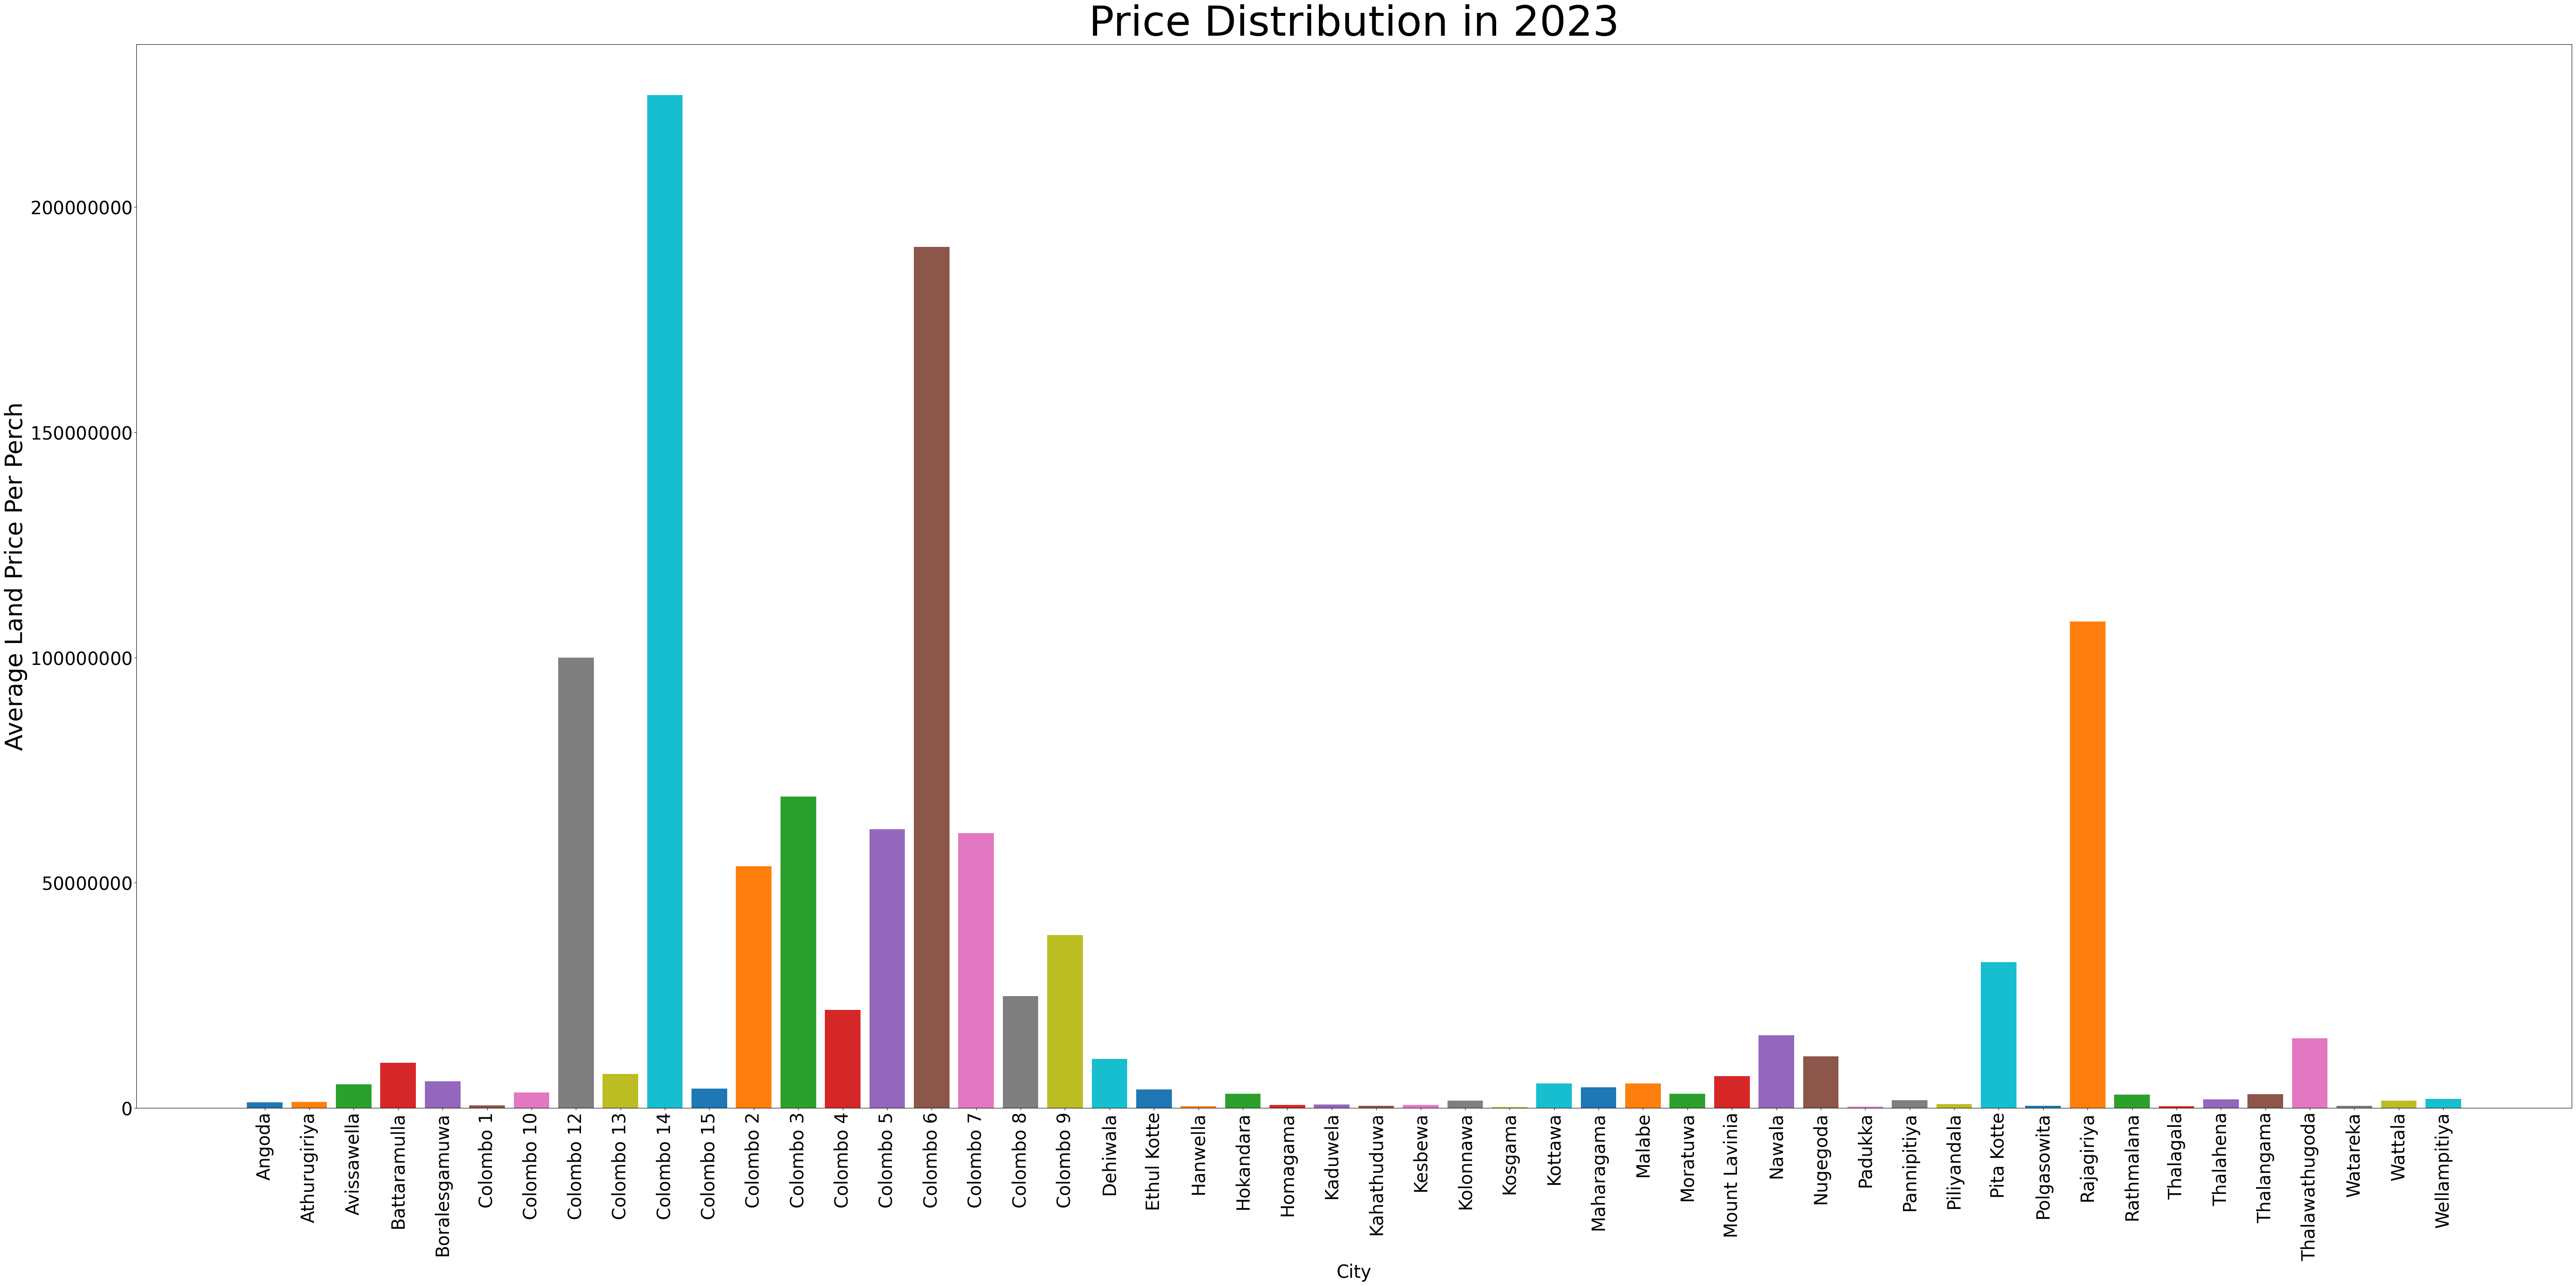

In [34]:
city_grouped_2023 = df_2023.groupby('main_city')

plt.figure(figsize=(60, 30)) 

for name, group in city_grouped_2023:
    filtered_data = group.dropna(subset=['price_land_pp'])
    plt.bar(name, filtered_data['price_land_pp'].mean())

plt.xlabel('City', fontsize=30)
plt.title('Price Distribution in 2023', fontsize=70)
plt.ylabel('Average Land Price Per Perch', fontsize=40)  

plt.xticks(rotation=90, fontsize=30)  

plt.yticks(fontsize=30)  

plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().ticklabel_format(style='plain', axis='y')

plt.tight_layout()  
plt.show()

## Average Monthly Price Variation Over Time 

C:\Users\User\AppData\Local\Temp\ipykernel_81376\2127329753.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['year_month'] = city_data['year'].astype(str) + '/' + city_data['month'].astype(str).str.zfill(2)


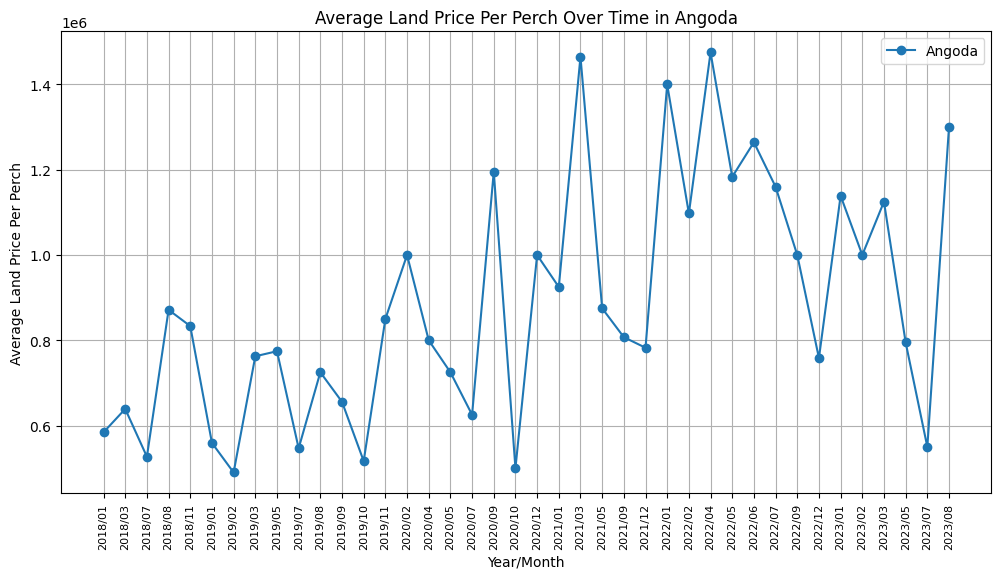

C:\Users\User\AppData\Local\Temp\ipykernel_81376\2127329753.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['year_month'] = city_data['year'].astype(str) + '/' + city_data['month'].astype(str).str.zfill(2)


C:\Users\User\AppData\Local\Temp\ipykernel_81376\2127329753.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['year_month'] = city_data['year'].astype(str) + '/' + city_data['month'].astype(str).str.zfill(2)


C:\Users\User\AppData\Local\Temp\ipykernel_81376\2127329753.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['year_month'] = city_data['year'].astype(str) + '/' + city_data['month'].astype(str).str.zfill(2)


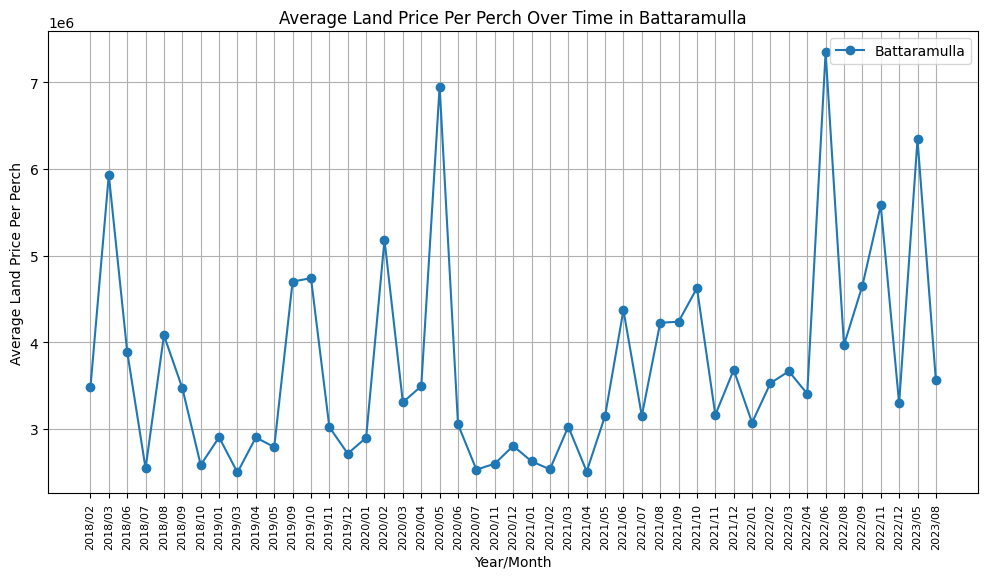

C:\Users\User\AppData\Local\Temp\ipykernel_81376\2127329753.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['year_month'] = city_data['year'].astype(str) + '/' + city_data['month'].astype(str).str.zfill(2)


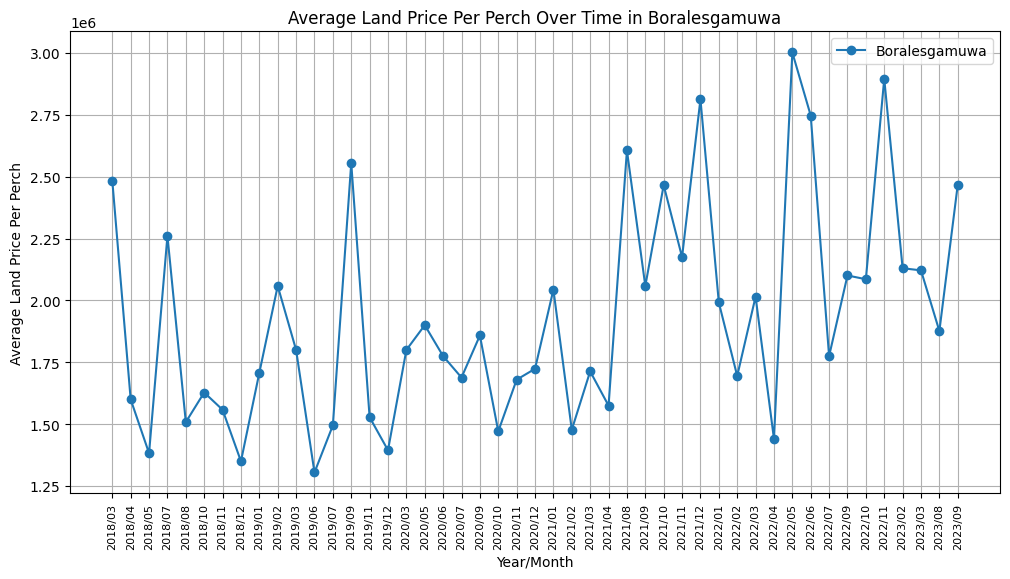

C:\Users\User\AppData\Local\Temp\ipykernel_81376\2127329753.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['year_month'] = city_data['year'].astype(str) + '/' + city_data['month'].astype(str).str.zfill(2)


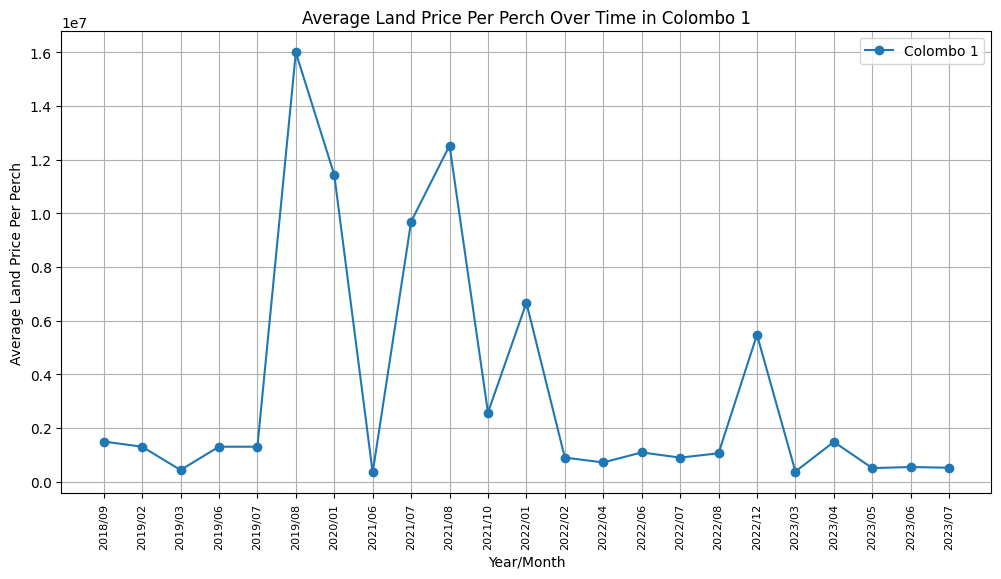

C:\Users\User\AppData\Local\Temp\ipykernel_81376\2127329753.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['year_month'] = city_data['year'].astype(str) + '/' + city_data['month'].astype(str).str.zfill(2)


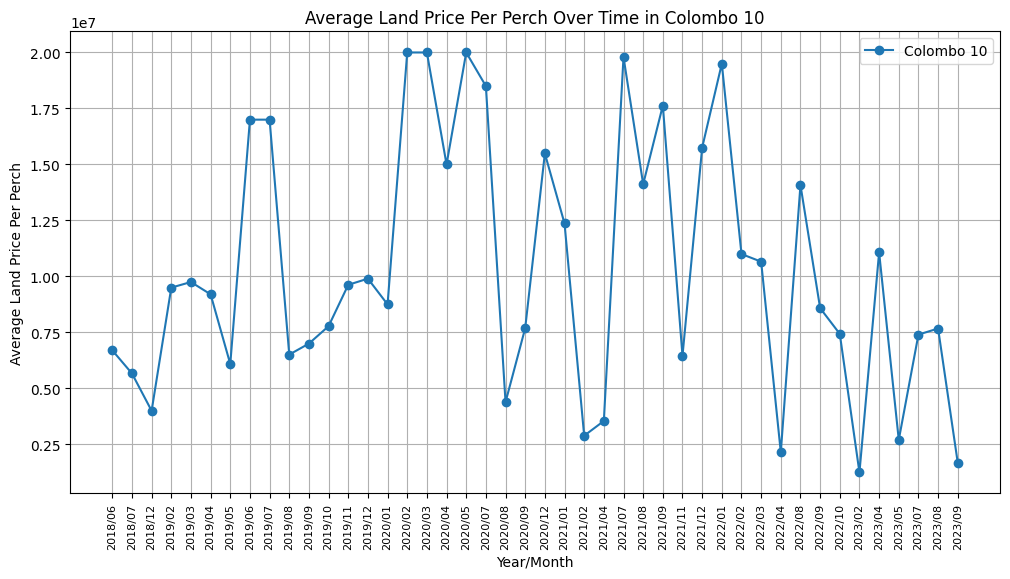

C:\Users\User\AppData\Local\Temp\ipykernel_81376\2127329753.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['year_month'] = city_data['year'].astype(str) + '/' + city_data['month'].astype(str).str.zfill(2)


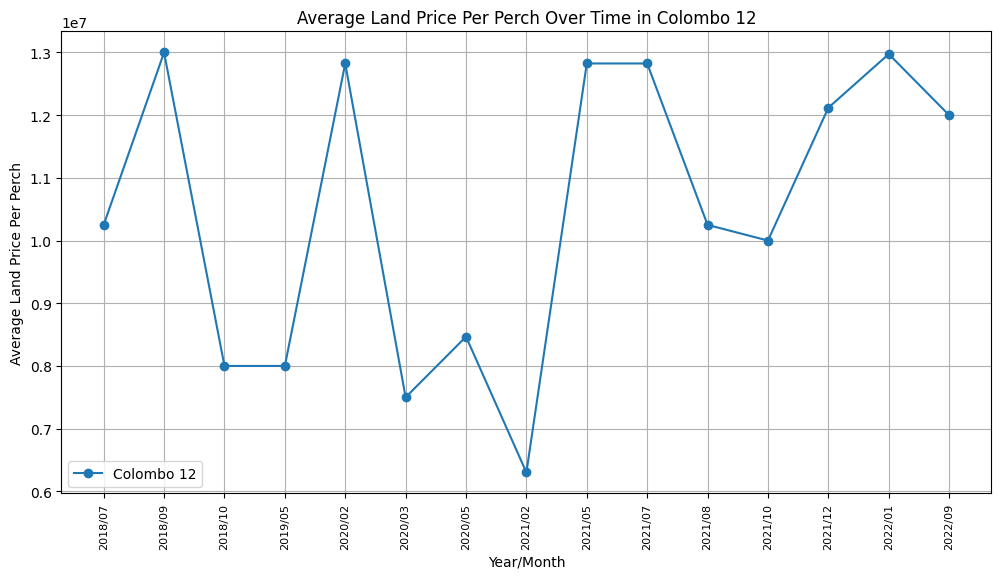

C:\Users\User\AppData\Local\Temp\ipykernel_81376\2127329753.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['year_month'] = city_data['year'].astype(str) + '/' + city_data['month'].astype(str).str.zfill(2)


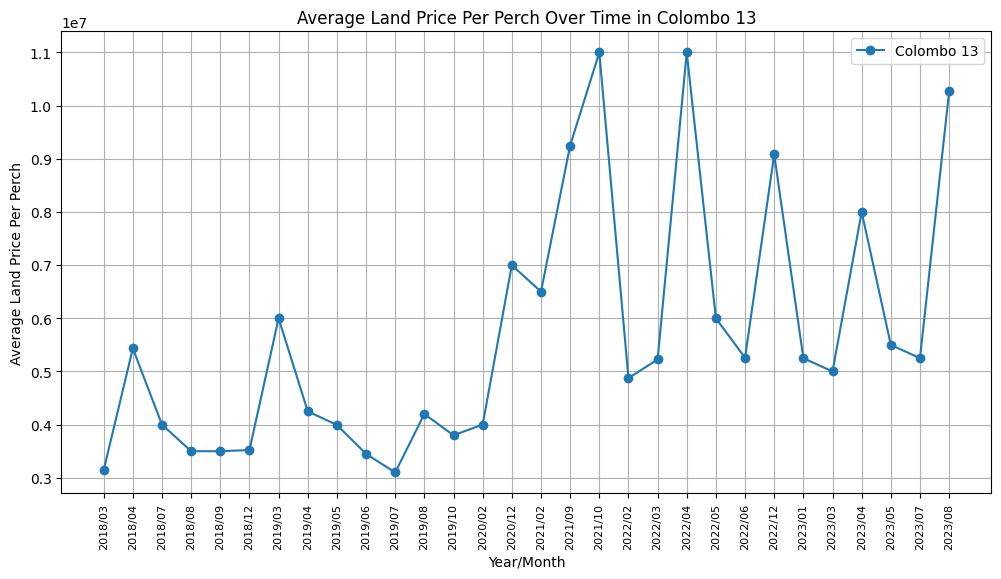

C:\Users\User\AppData\Local\Temp\ipykernel_81376\2127329753.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['year_month'] = city_data['year'].astype(str) + '/' + city_data['month'].astype(str).str.zfill(2)


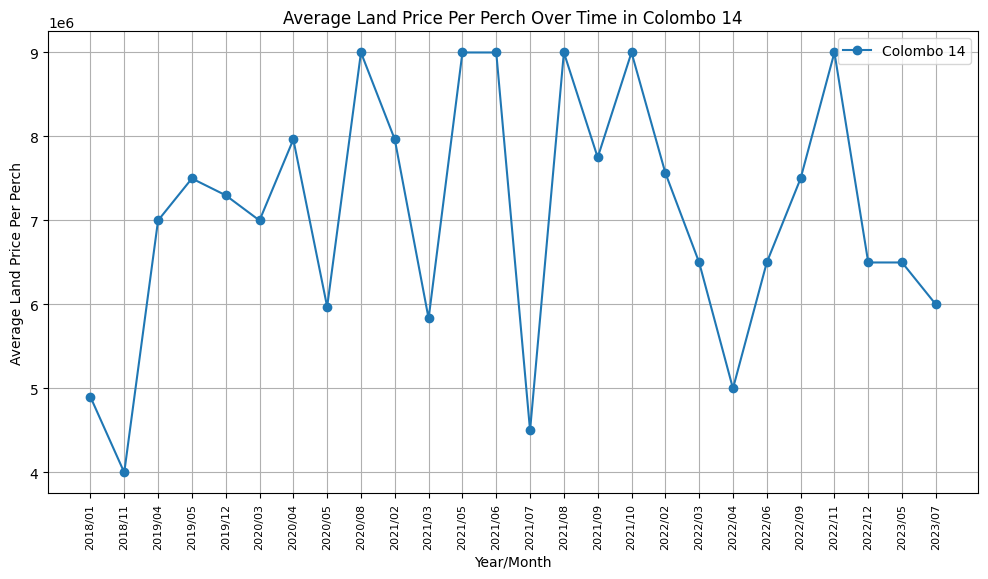

C:\Users\User\AppData\Local\Temp\ipykernel_81376\2127329753.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['year_month'] = city_data['year'].astype(str) + '/' + city_data['month'].astype(str).str.zfill(2)


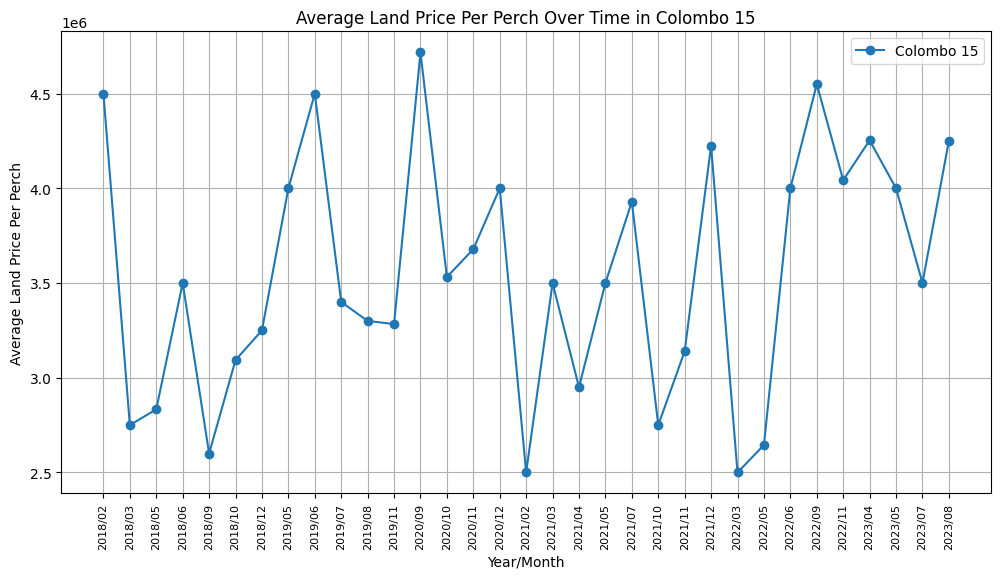

C:\Users\User\AppData\Local\Temp\ipykernel_81376\2127329753.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['year_month'] = city_data['year'].astype(str) + '/' + city_data['month'].astype(str).str.zfill(2)


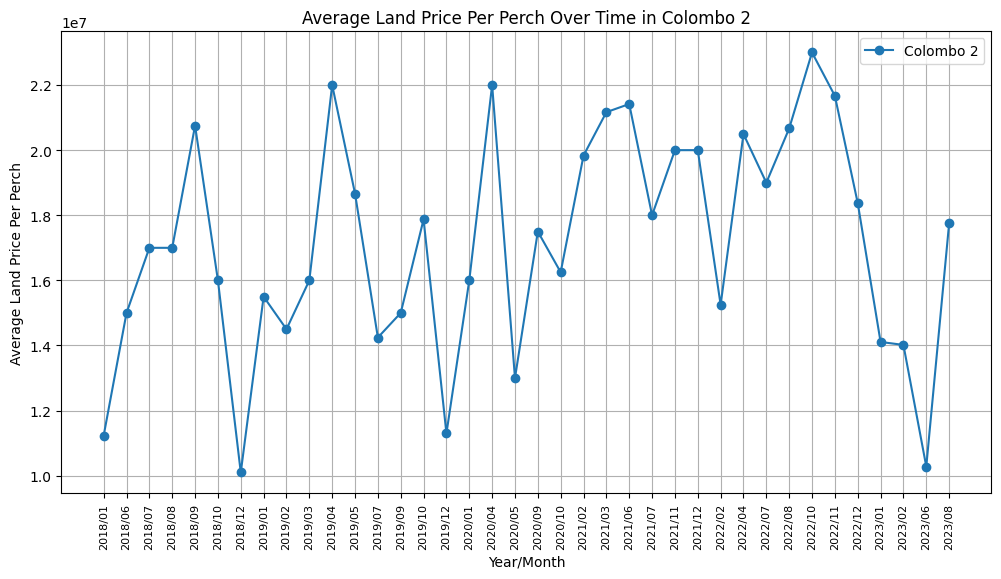

C:\Users\User\AppData\Local\Temp\ipykernel_81376\2127329753.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['year_month'] = city_data['year'].astype(str) + '/' + city_data['month'].astype(str).str.zfill(2)


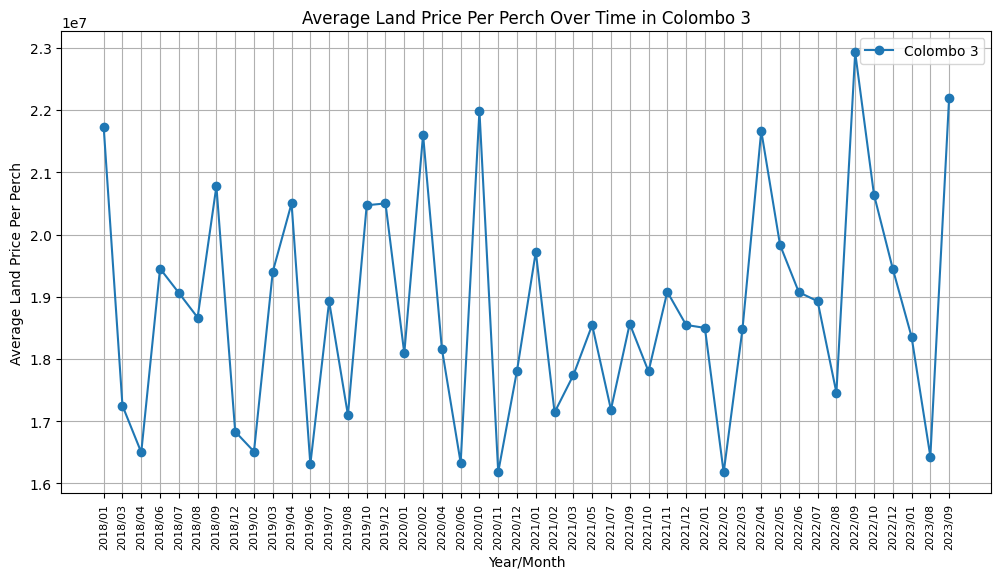

C:\Users\User\AppData\Local\Temp\ipykernel_81376\2127329753.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['year_month'] = city_data['year'].astype(str) + '/' + city_data['month'].astype(str).str.zfill(2)


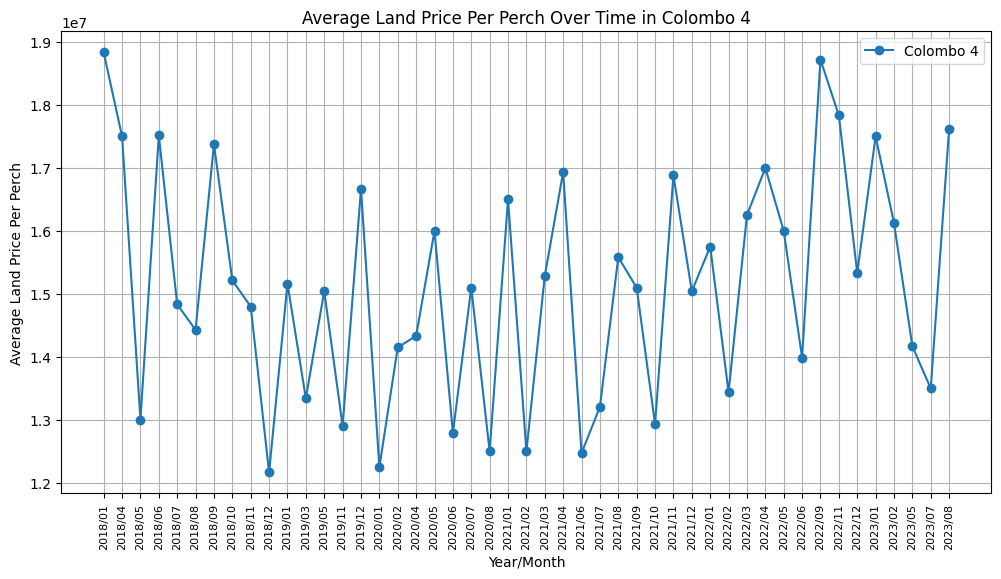

C:\Users\User\AppData\Local\Temp\ipykernel_81376\2127329753.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['year_month'] = city_data['year'].astype(str) + '/' + city_data['month'].astype(str).str.zfill(2)


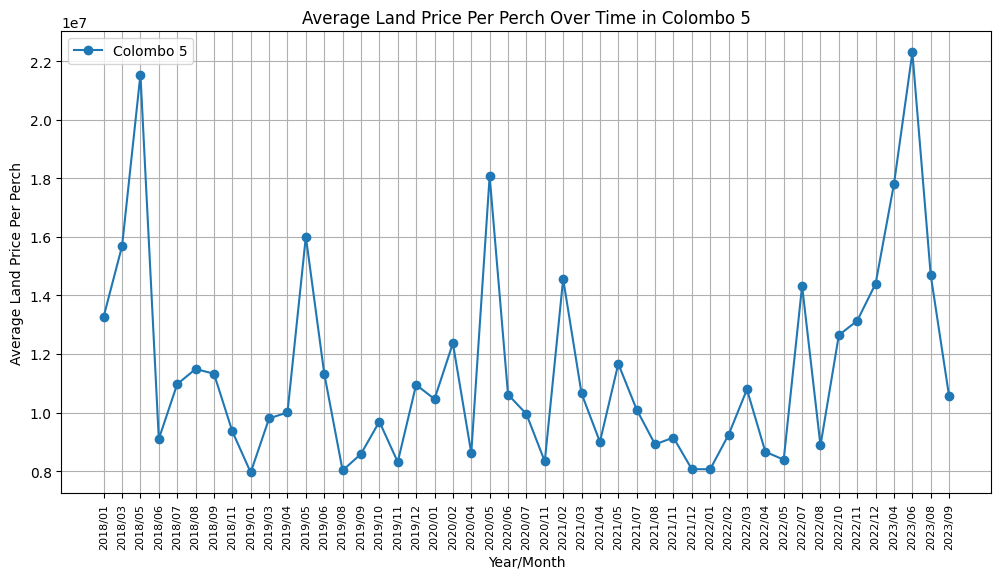

C:\Users\User\AppData\Local\Temp\ipykernel_81376\2127329753.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['year_month'] = city_data['year'].astype(str) + '/' + city_data['month'].astype(str).str.zfill(2)


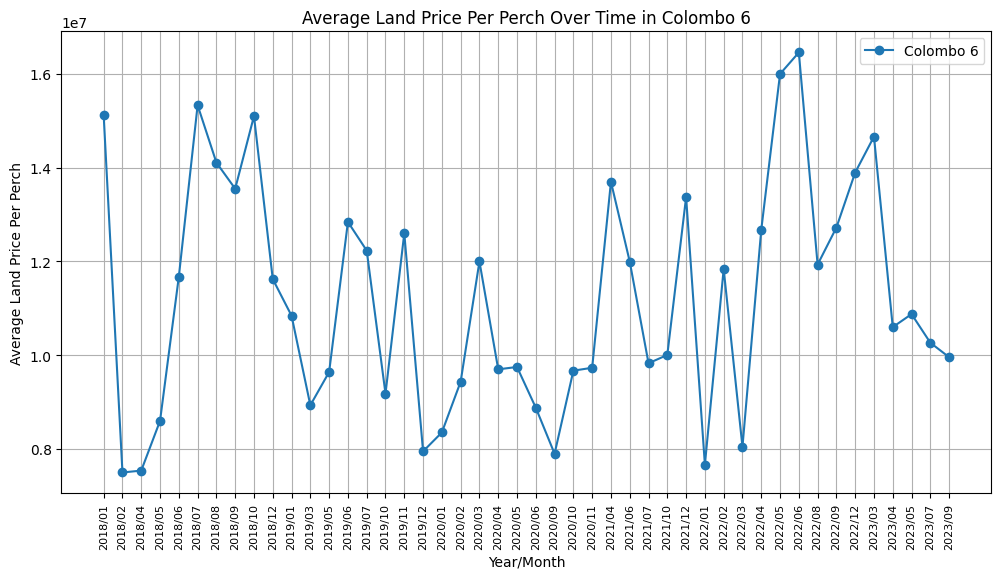

C:\Users\User\AppData\Local\Temp\ipykernel_81376\2127329753.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['year_month'] = city_data['year'].astype(str) + '/' + city_data['month'].astype(str).str.zfill(2)


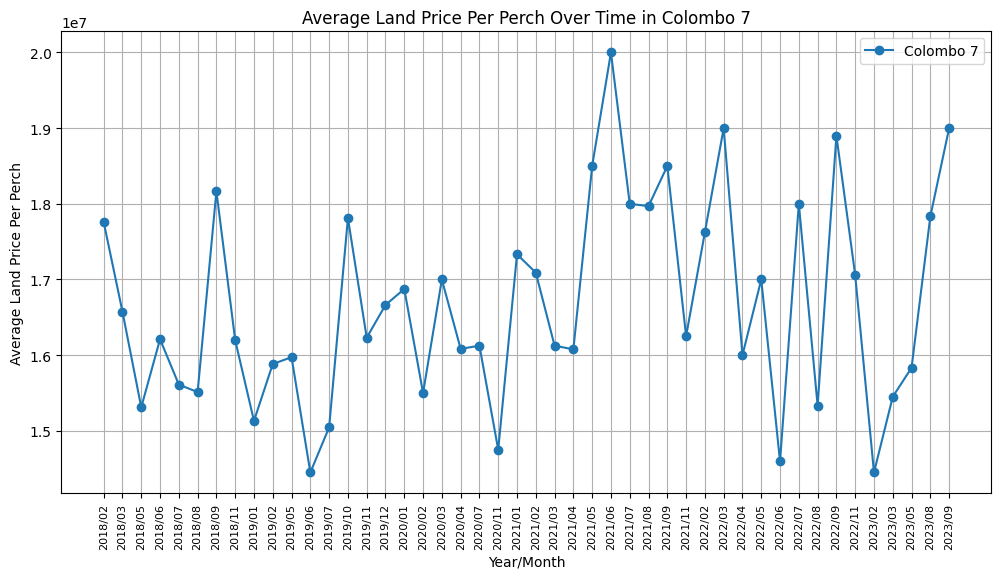

C:\Users\User\AppData\Local\Temp\ipykernel_81376\2127329753.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['year_month'] = city_data['year'].astype(str) + '/' + city_data['month'].astype(str).str.zfill(2)


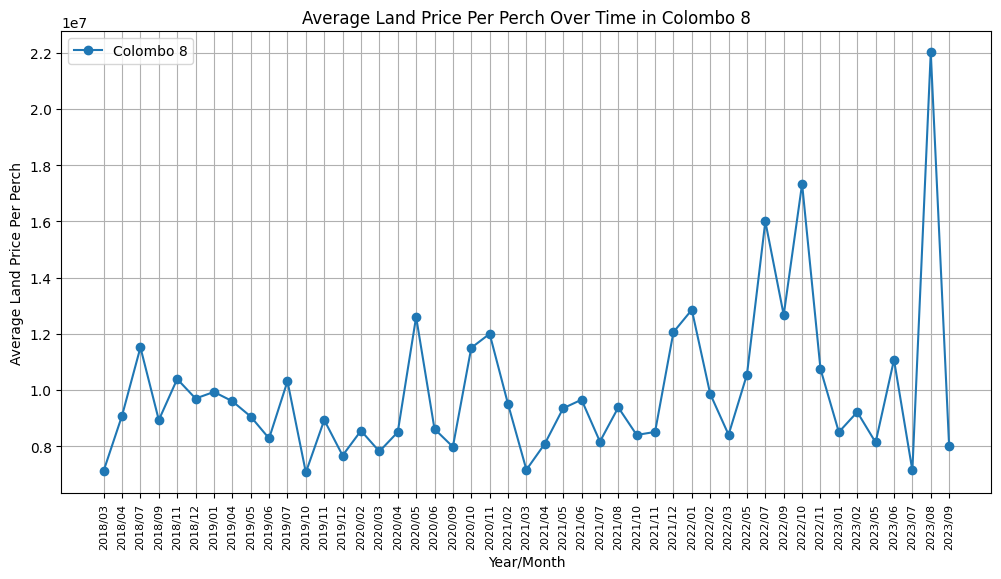

C:\Users\User\AppData\Local\Temp\ipykernel_81376\2127329753.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['year_month'] = city_data['year'].astype(str) + '/' + city_data['month'].astype(str).str.zfill(2)


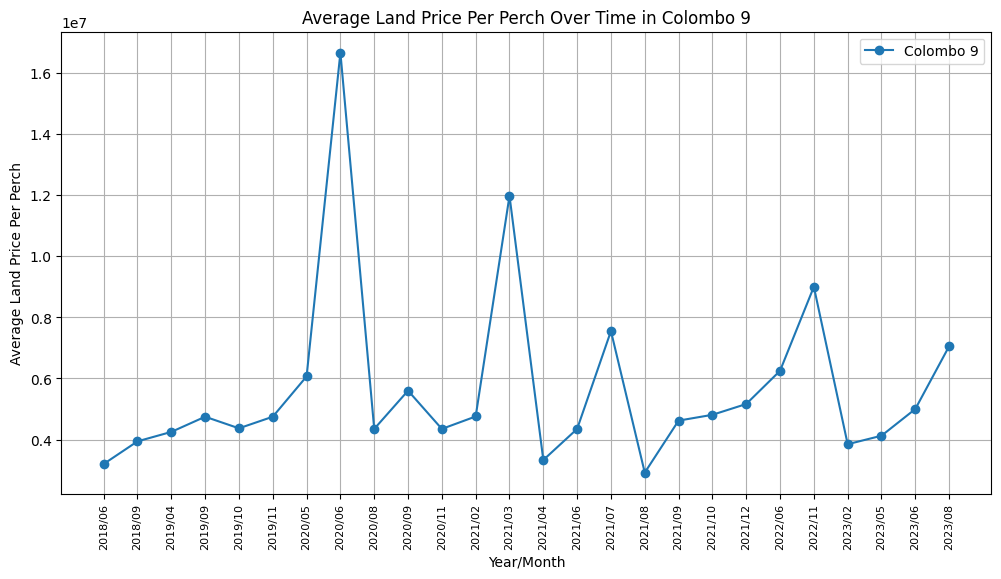

C:\Users\User\AppData\Local\Temp\ipykernel_81376\2127329753.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['year_month'] = city_data['year'].astype(str) + '/' + city_data['month'].astype(str).str.zfill(2)


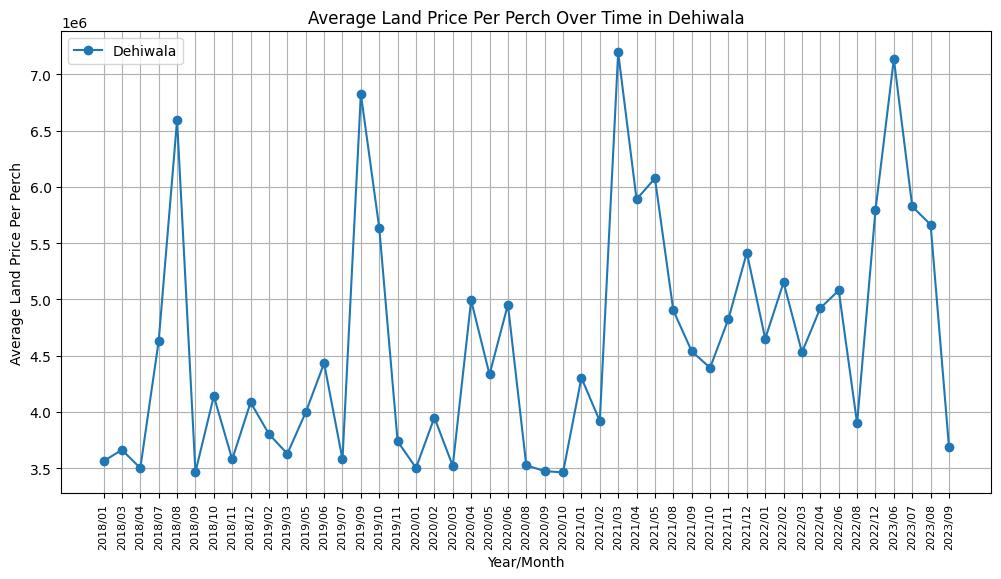

C:\Users\User\AppData\Local\Temp\ipykernel_81376\2127329753.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['year_month'] = city_data['year'].astype(str) + '/' + city_data['month'].astype(str).str.zfill(2)


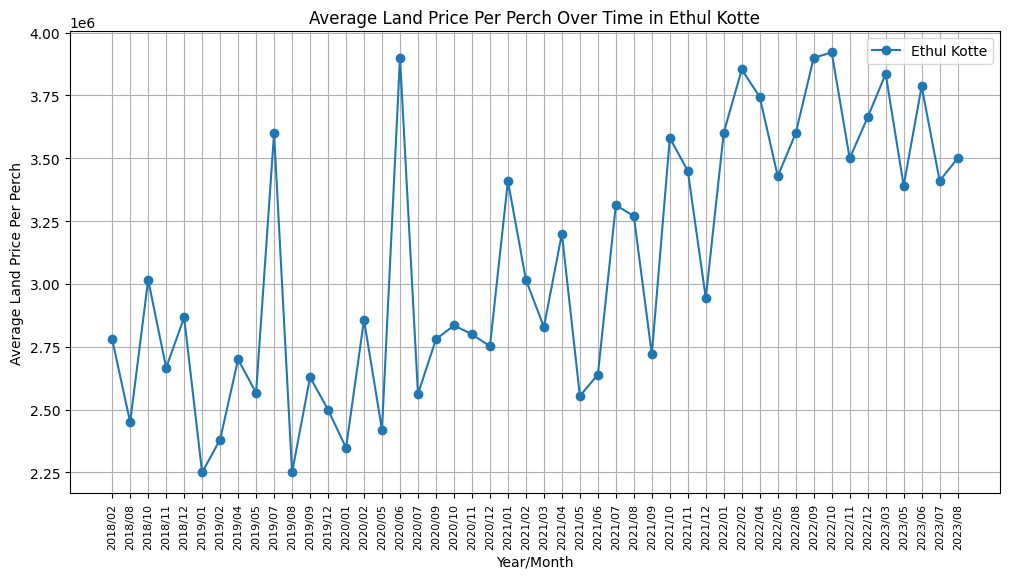

C:\Users\User\AppData\Local\Temp\ipykernel_81376\2127329753.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['year_month'] = city_data['year'].astype(str) + '/' + city_data['month'].astype(str).str.zfill(2)


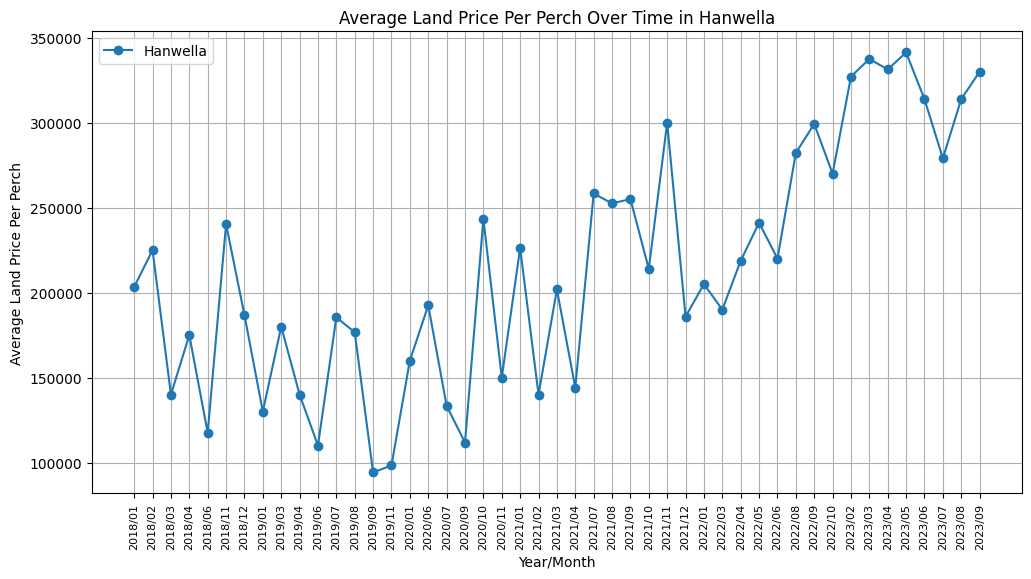

C:\Users\User\AppData\Local\Temp\ipykernel_81376\2127329753.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['year_month'] = city_data['year'].astype(str) + '/' + city_data['month'].astype(str).str.zfill(2)


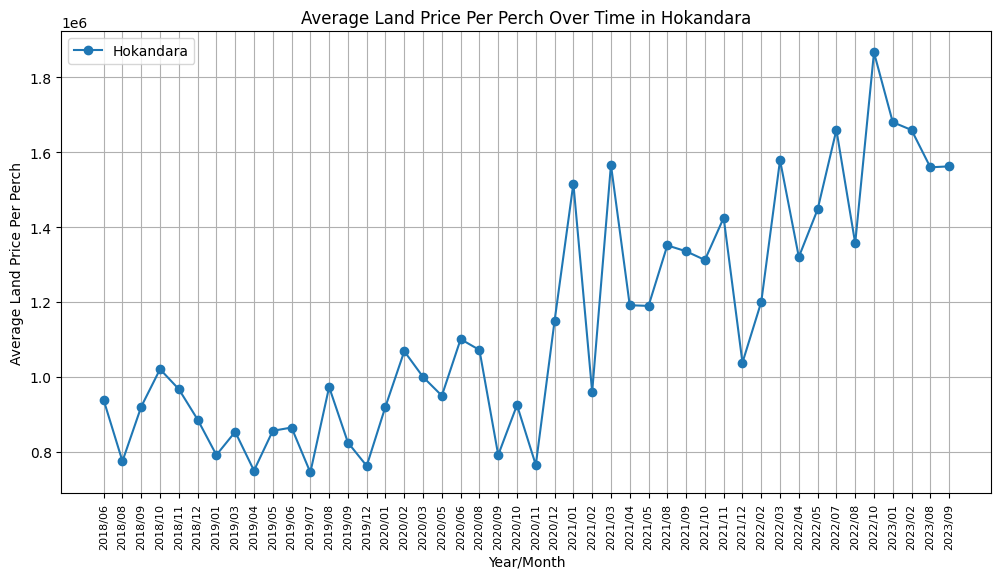

C:\Users\User\AppData\Local\Temp\ipykernel_81376\2127329753.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['year_month'] = city_data['year'].astype(str) + '/' + city_data['month'].astype(str).str.zfill(2)


C:\Users\User\AppData\Local\Temp\ipykernel_81376\2127329753.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['year_month'] = city_data['year'].astype(str) + '/' + city_data['month'].astype(str).str.zfill(2)


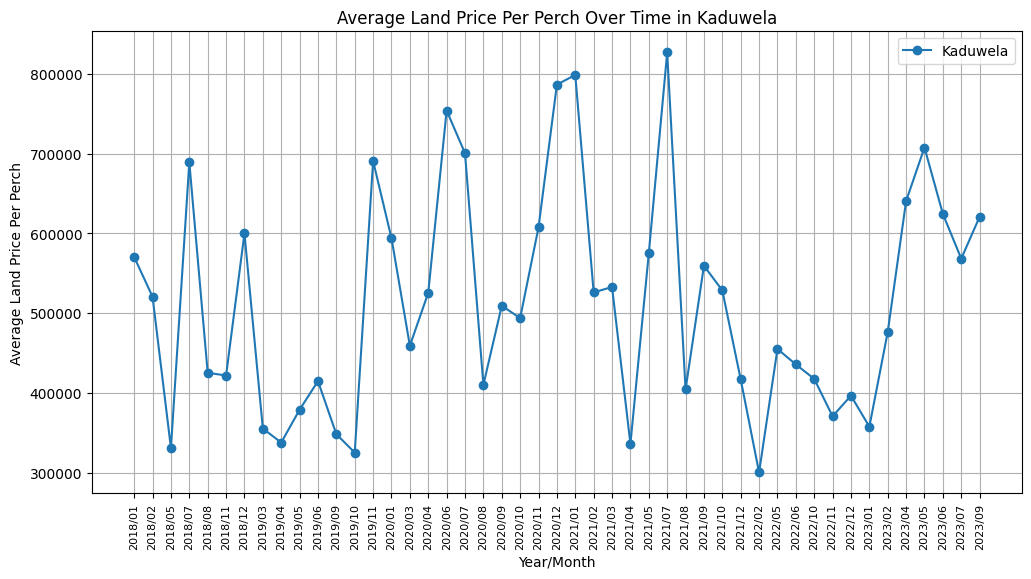

C:\Users\User\AppData\Local\Temp\ipykernel_81376\2127329753.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['year_month'] = city_data['year'].astype(str) + '/' + city_data['month'].astype(str).str.zfill(2)


C:\Users\User\AppData\Local\Temp\ipykernel_81376\2127329753.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['year_month'] = city_data['year'].astype(str) + '/' + city_data['month'].astype(str).str.zfill(2)


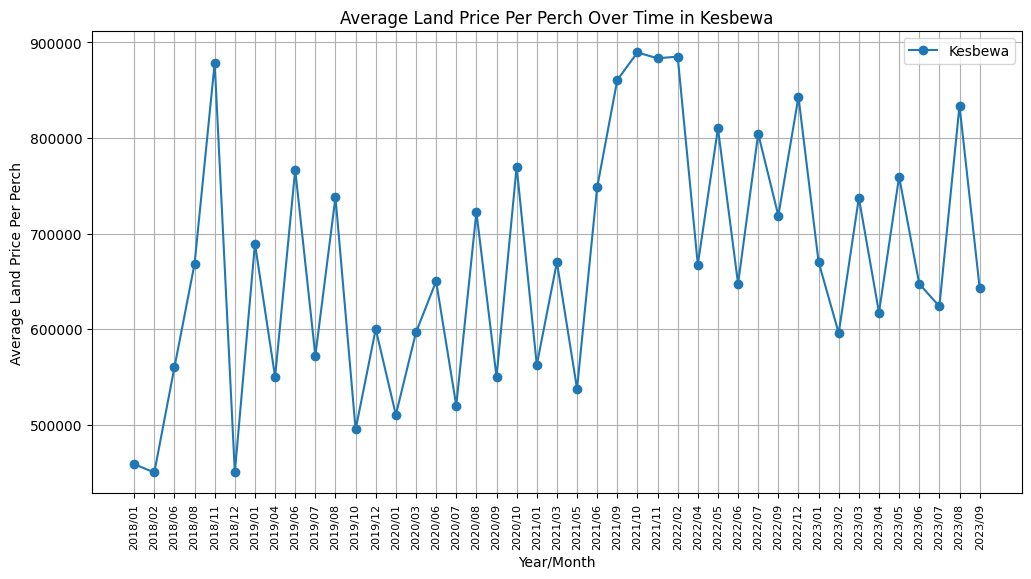

C:\Users\User\AppData\Local\Temp\ipykernel_81376\2127329753.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['year_month'] = city_data['year'].astype(str) + '/' + city_data['month'].astype(str).str.zfill(2)


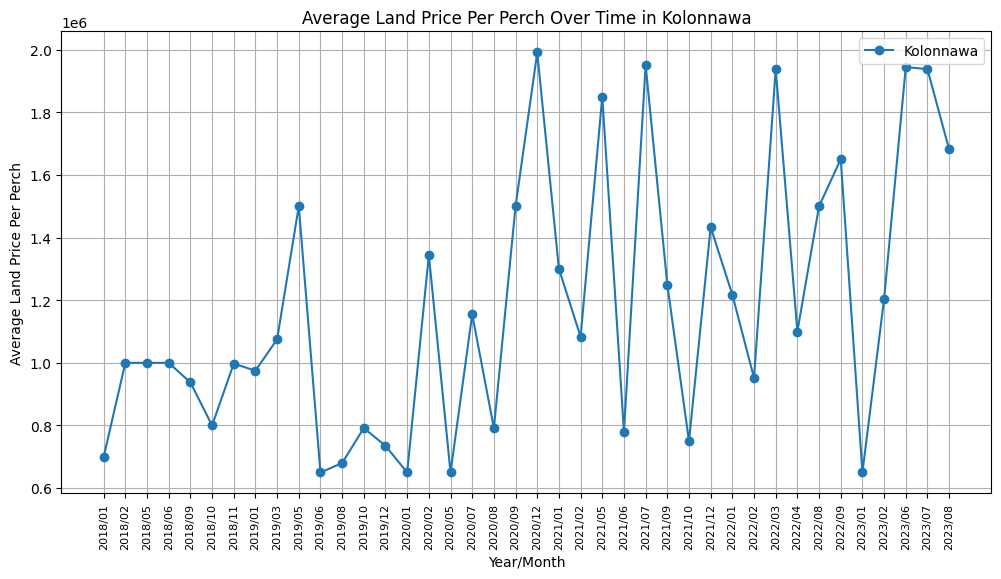

C:\Users\User\AppData\Local\Temp\ipykernel_81376\2127329753.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['year_month'] = city_data['year'].astype(str) + '/' + city_data['month'].astype(str).str.zfill(2)


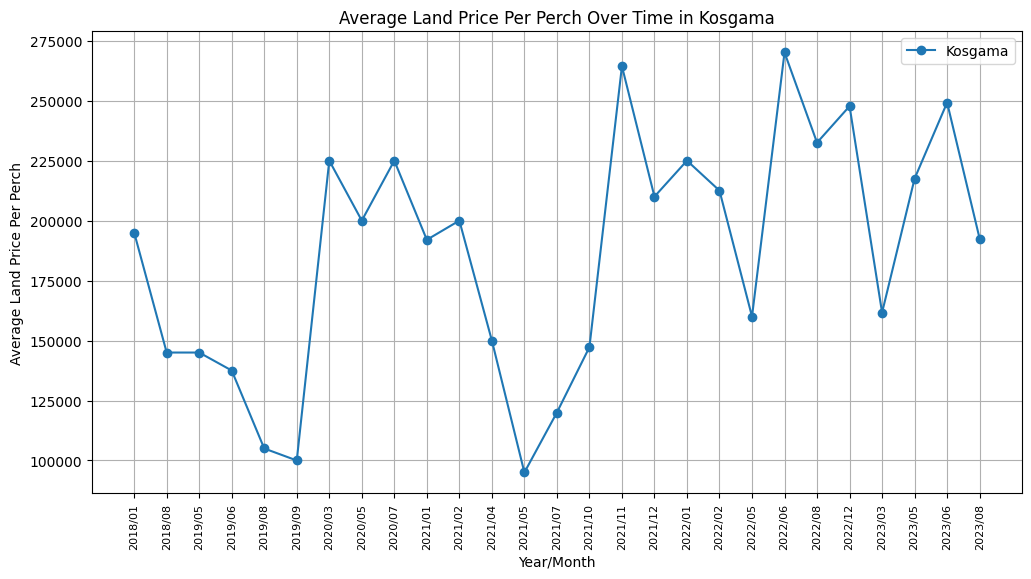

C:\Users\User\AppData\Local\Temp\ipykernel_81376\2127329753.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['year_month'] = city_data['year'].astype(str) + '/' + city_data['month'].astype(str).str.zfill(2)


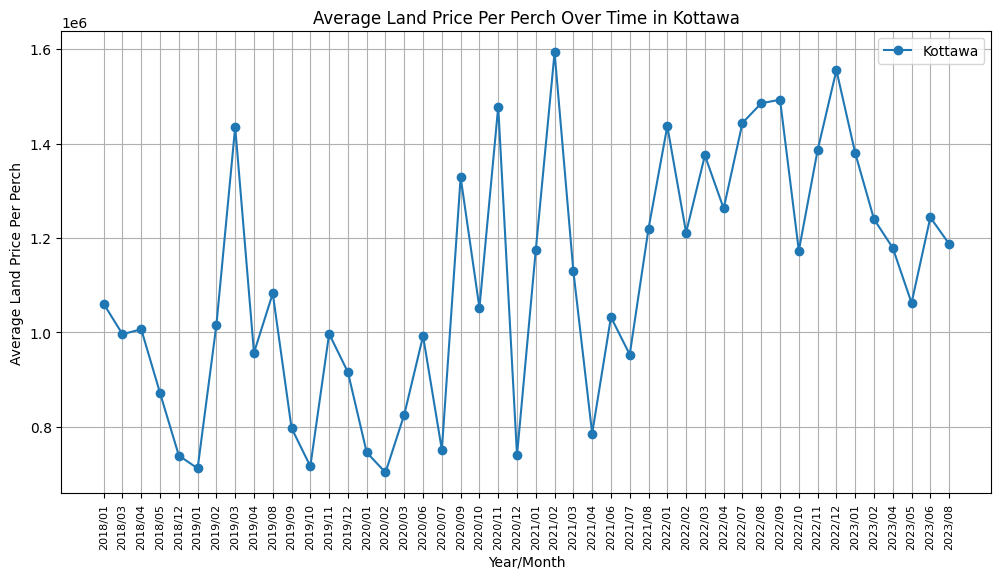

C:\Users\User\AppData\Local\Temp\ipykernel_81376\2127329753.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['year_month'] = city_data['year'].astype(str) + '/' + city_data['month'].astype(str).str.zfill(2)


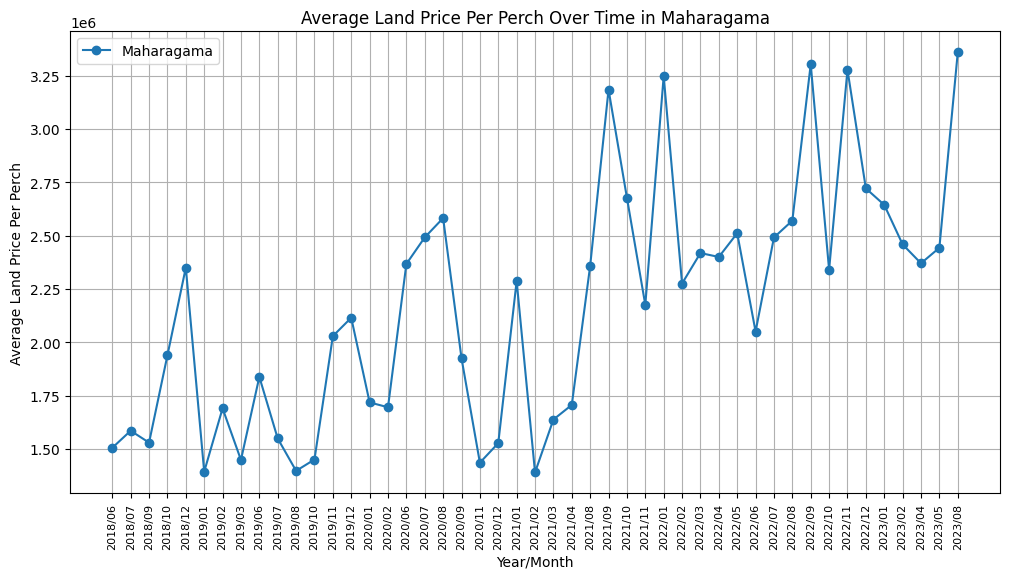

C:\Users\User\AppData\Local\Temp\ipykernel_81376\2127329753.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['year_month'] = city_data['year'].astype(str) + '/' + city_data['month'].astype(str).str.zfill(2)


C:\Users\User\AppData\Local\Temp\ipykernel_81376\2127329753.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['year_month'] = city_data['year'].astype(str) + '/' + city_data['month'].astype(str).str.zfill(2)


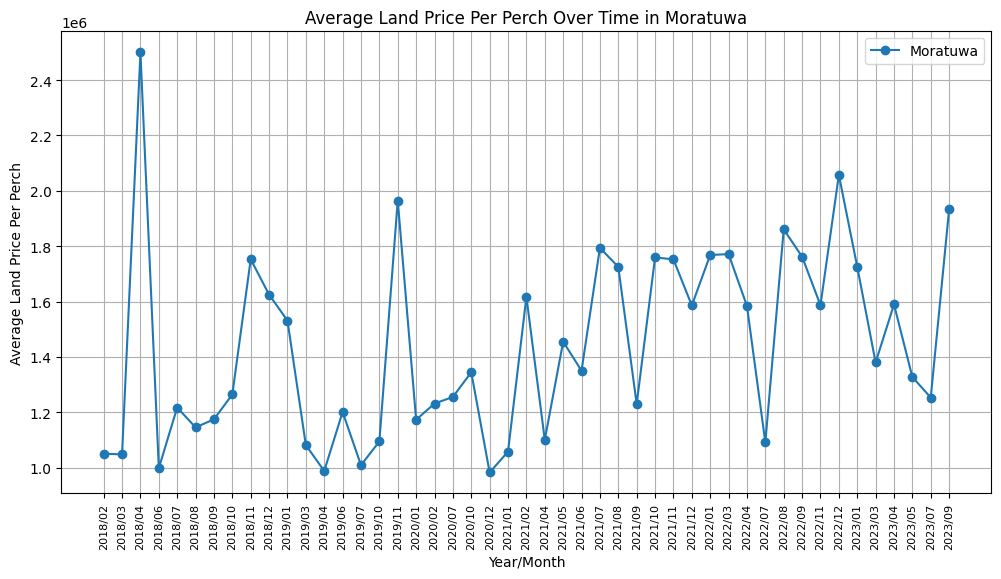

C:\Users\User\AppData\Local\Temp\ipykernel_81376\2127329753.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['year_month'] = city_data['year'].astype(str) + '/' + city_data['month'].astype(str).str.zfill(2)


C:\Users\User\AppData\Local\Temp\ipykernel_81376\2127329753.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['year_month'] = city_data['year'].astype(str) + '/' + city_data['month'].astype(str).str.zfill(2)


C:\Users\User\AppData\Local\Temp\ipykernel_81376\2127329753.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['year_month'] = city_data['year'].astype(str) + '/' + city_data['month'].astype(str).str.zfill(2)


C:\Users\User\AppData\Local\Temp\ipykernel_81376\2127329753.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['year_month'] = city_data['year'].astype(str) + '/' + city_data['month'].astype(str).str.zfill(2)


C:\Users\User\AppData\Local\Temp\ipykernel_81376\2127329753.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['year_month'] = city_data['year'].astype(str) + '/' + city_data['month'].astype(str).str.zfill(2)


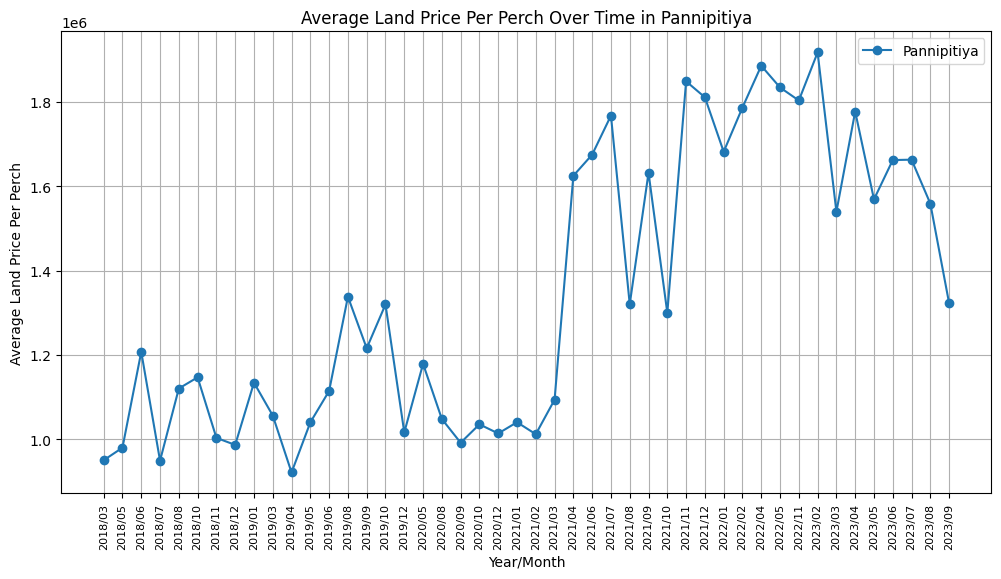

C:\Users\User\AppData\Local\Temp\ipykernel_81376\2127329753.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['year_month'] = city_data['year'].astype(str) + '/' + city_data['month'].astype(str).str.zfill(2)


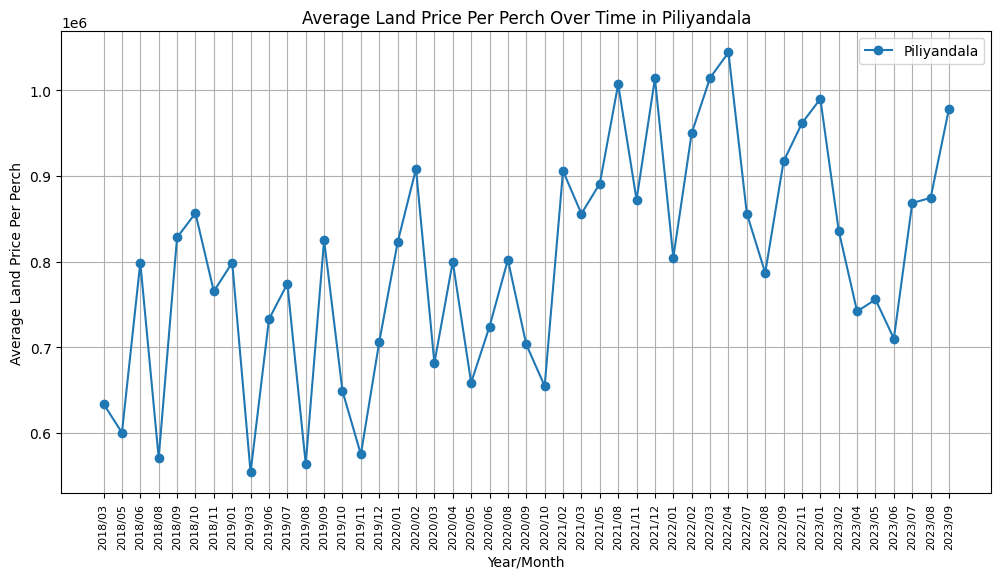

C:\Users\User\AppData\Local\Temp\ipykernel_81376\2127329753.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['year_month'] = city_data['year'].astype(str) + '/' + city_data['month'].astype(str).str.zfill(2)


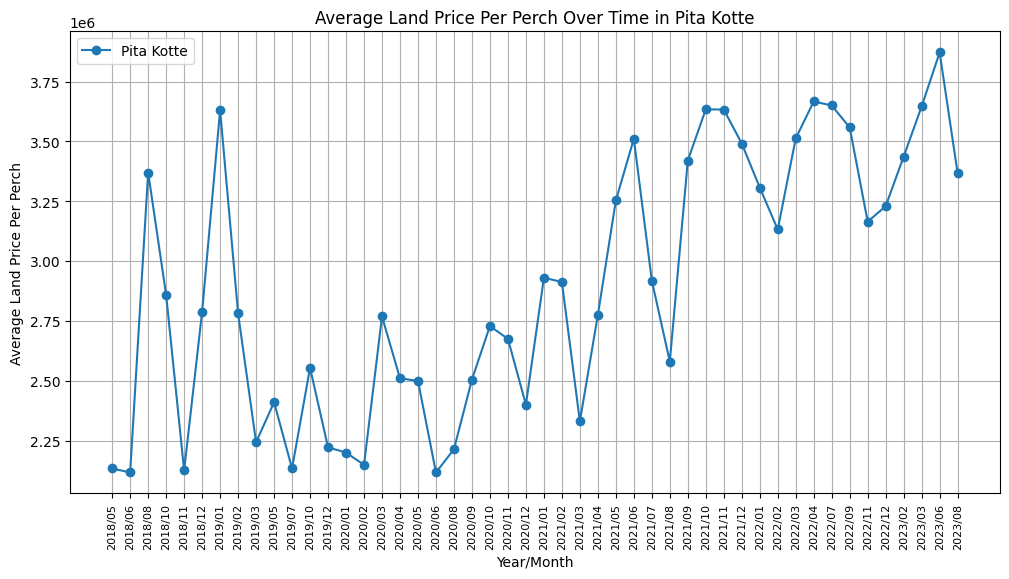

C:\Users\User\AppData\Local\Temp\ipykernel_81376\2127329753.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['year_month'] = city_data['year'].astype(str) + '/' + city_data['month'].astype(str).str.zfill(2)


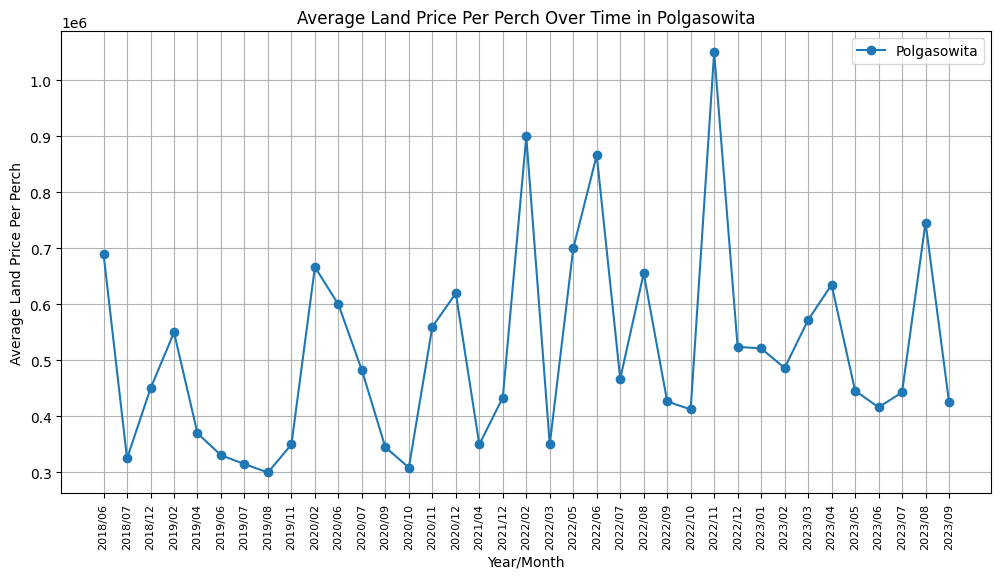

C:\Users\User\AppData\Local\Temp\ipykernel_81376\2127329753.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['year_month'] = city_data['year'].astype(str) + '/' + city_data['month'].astype(str).str.zfill(2)


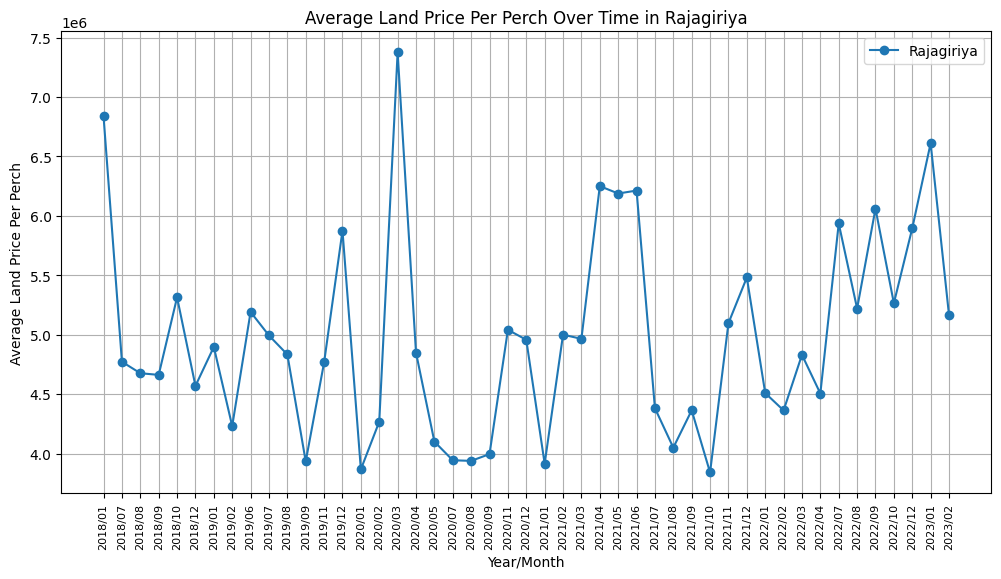

C:\Users\User\AppData\Local\Temp\ipykernel_81376\2127329753.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['year_month'] = city_data['year'].astype(str) + '/' + city_data['month'].astype(str).str.zfill(2)


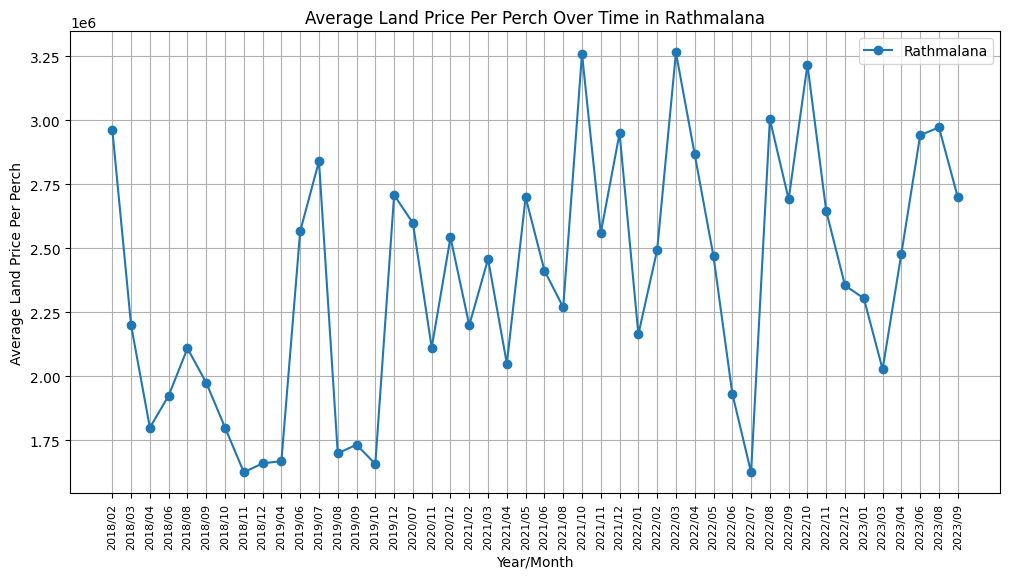

C:\Users\User\AppData\Local\Temp\ipykernel_81376\2127329753.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['year_month'] = city_data['year'].astype(str) + '/' + city_data['month'].astype(str).str.zfill(2)


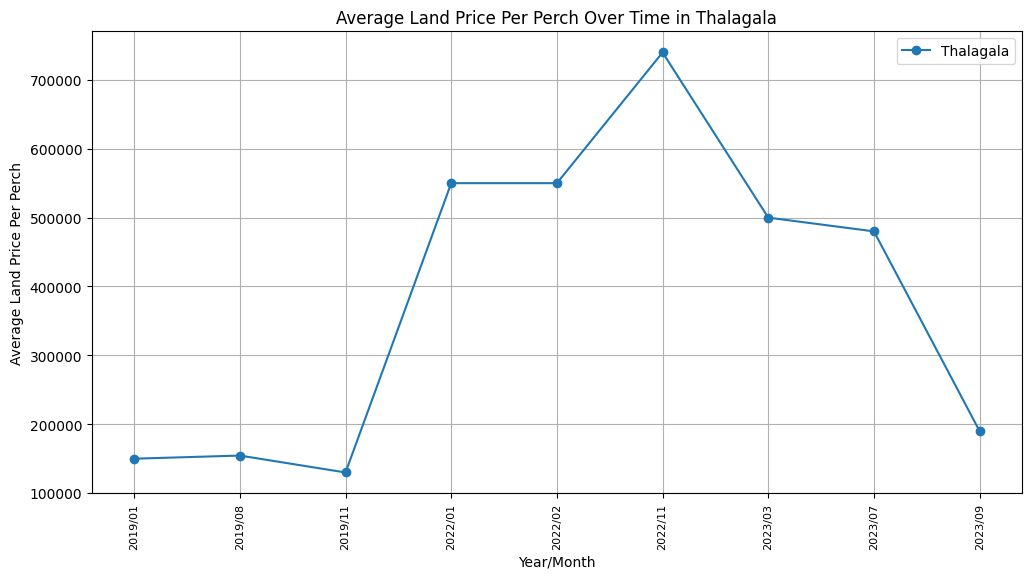

C:\Users\User\AppData\Local\Temp\ipykernel_81376\2127329753.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['year_month'] = city_data['year'].astype(str) + '/' + city_data['month'].astype(str).str.zfill(2)


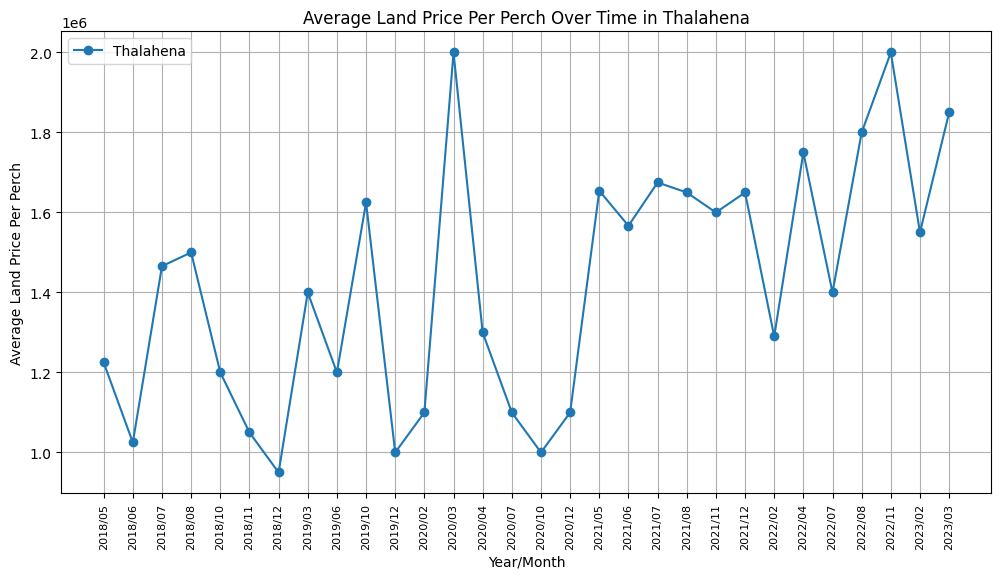

C:\Users\User\AppData\Local\Temp\ipykernel_81376\2127329753.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['year_month'] = city_data['year'].astype(str) + '/' + city_data['month'].astype(str).str.zfill(2)


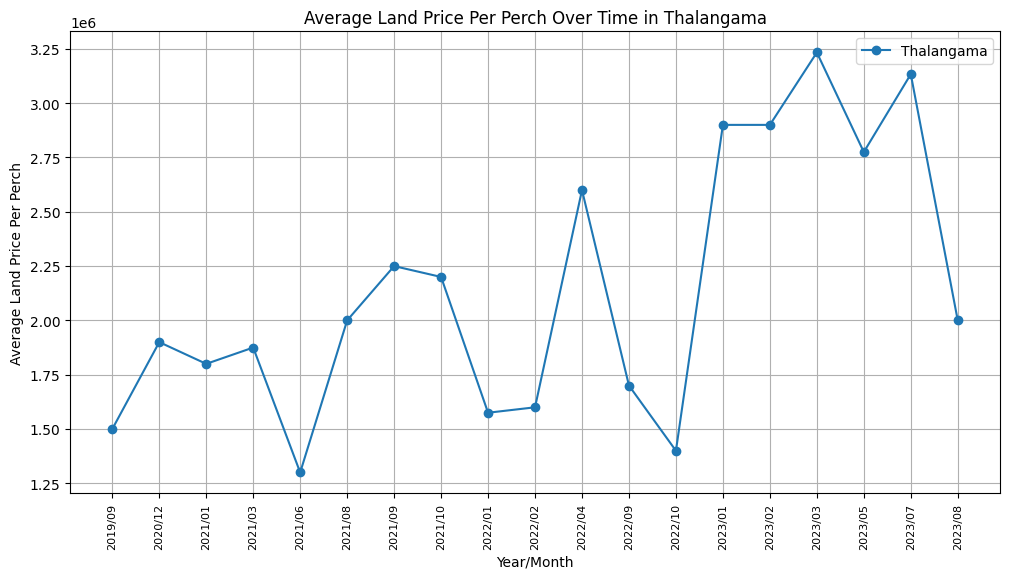

C:\Users\User\AppData\Local\Temp\ipykernel_81376\2127329753.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['year_month'] = city_data['year'].astype(str) + '/' + city_data['month'].astype(str).str.zfill(2)


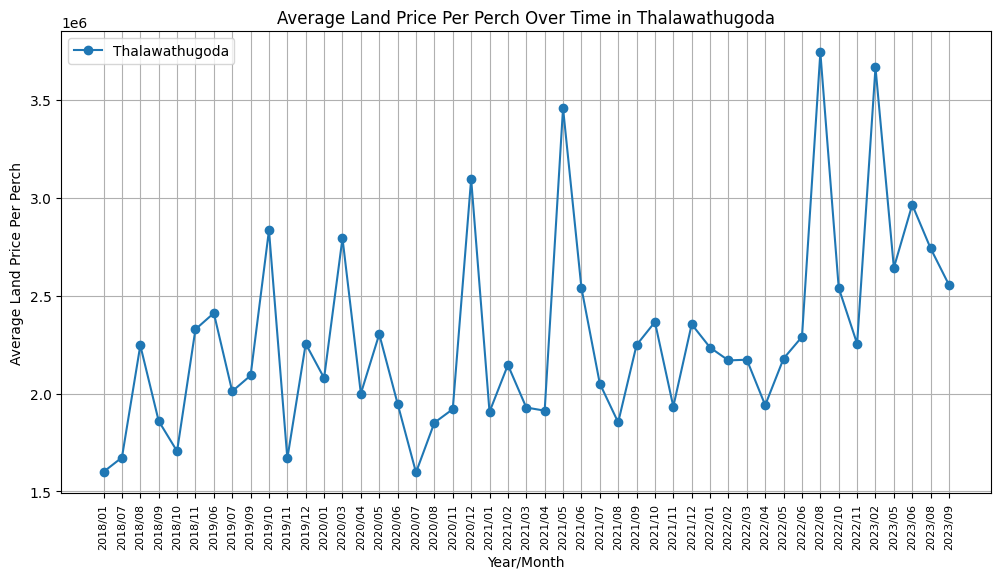

C:\Users\User\AppData\Local\Temp\ipykernel_81376\2127329753.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['year_month'] = city_data['year'].astype(str) + '/' + city_data['month'].astype(str).str.zfill(2)


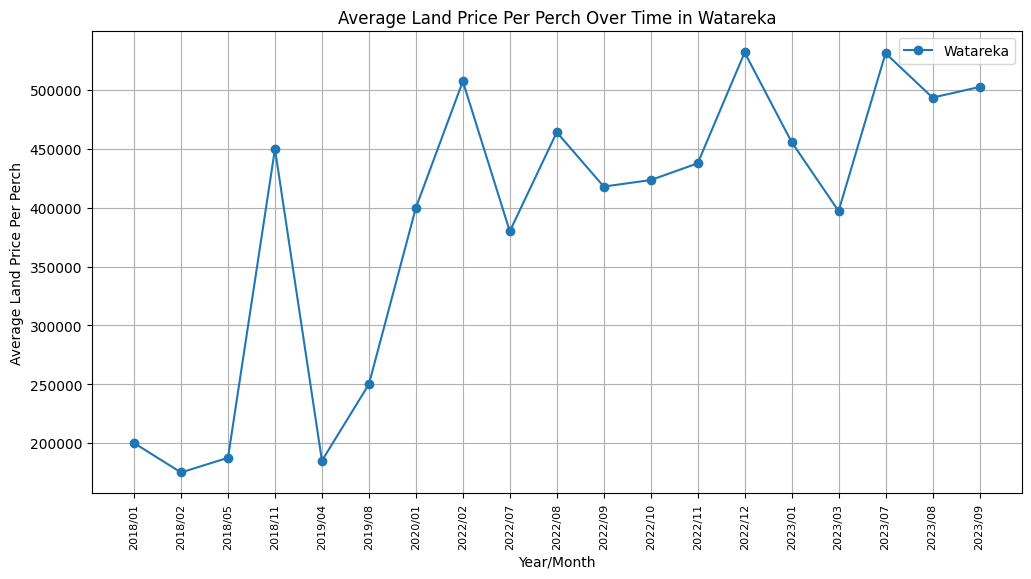

C:\Users\User\AppData\Local\Temp\ipykernel_81376\2127329753.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['year_month'] = city_data['year'].astype(str) + '/' + city_data['month'].astype(str).str.zfill(2)


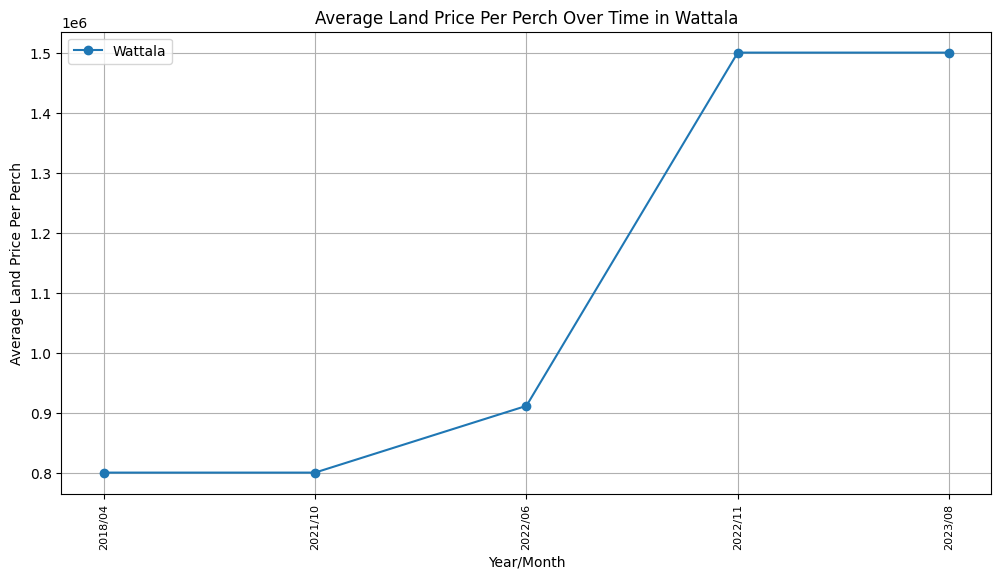

C:\Users\User\AppData\Local\Temp\ipykernel_81376\2127329753.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['year_month'] = city_data['year'].astype(str) + '/' + city_data['month'].astype(str).str.zfill(2)


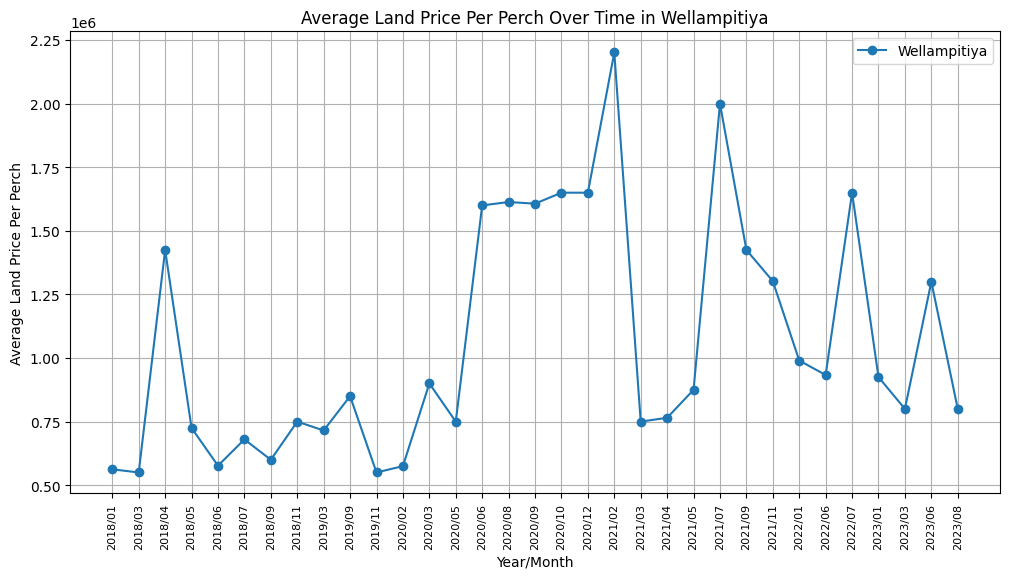

In [35]:
df['posted_date'] = pd.to_datetime(df['posted_date'], format='%m/%d/%Y')
df['year'] = df['posted_date'].dt.year
df['month'] = df['posted_date'].dt.month

city_monthly_avg = df.groupby(['main_city', 'year', 'month'])['price_land_pp'].mean().reset_index()

cities = city_monthly_avg['main_city'].unique()

lower_percentile = 15
upper_percentile = 85

for city in cities:
    city_data = city_monthly_avg[city_monthly_avg['main_city'] == city]

    city_data['year_month'] = city_data['year'].astype(str) + '/' + city_data['month'].astype(str).str.zfill(2)

    lower_limit = city_data['price_land_pp'].quantile(lower_percentile / 100)
    upper_limit = city_data['price_land_pp'].quantile(upper_percentile / 100)

    city_data_filtered = city_data[(city_data['price_land_pp'] >= lower_limit) & (city_data['price_land_pp'] <= upper_limit)]

    plt.figure(figsize=(12, 6))
    plt.plot(city_data_filtered['year_month'], city_data_filtered['price_land_pp'], marker='o', linestyle='-', label=city)

    plt.xlabel('Year/Month')
    plt.ylabel('Average Land Price Per Perch')
    plt.title(f'Average Land Price Per Perch Over Time in {city}')
    plt.xticks(rotation=90, fontsize=8)
    plt.legend()
    plt.grid(True)
    plt.show()